In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import odespy
import os
from datetime import datetime
import time
from tqdm import tqdm
import h5py
import pylab
import math
from scipy.integrate import solve_ivp
from scipy.spatial import Delaunay
from scipy.spatial import Voronoi, voronoi_plot_2d
from scipy.sparse import coo_matrix
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import seaborn as sns
import sys
cwd = os.getcwd()
sys.path.insert(1, cwd)
from rs_helper import rock_string_helpers_fullc2 as rs
from rs_helper.rock_string_analysis_helper import *
from matplotlib import animation, rc
from IPython.display import HTML
from moviepy.editor import VideoFileClip, concatenate_videoclips
from scipy.signal import argrelextrema
from scipy.interpolate import griddata
from shutil import copyfile
from scipy.stats import linregress
import copy

# Fig 3

Loading Simulation data from disk .......
Loading hdf5 file
Loading Simulation data from disk .......
Loading hdf5 file
Loading Simulation data from disk .......
Loading hdf5 file
Loading Simulation data from disk .......
Loading hdf5 file
Loading Simulation data from disk .......
Loading hdf5 file
Loading Simulation data from disk .......
Loading hdf5 file
Loading Simulation data from disk .......
Loading hdf5 file
Loading Simulation data from disk .......
Loading hdf5 file
Loading Simulation data from disk .......
Loading hdf5 file
Loading Simulation data from disk .......
Loading hdf5 file
Loading Simulation data from disk .......
Loading hdf5 file
Loading Simulation data from disk .......
Loading hdf5 file
Loading Simulation data from disk .......
Loading hdf5 file
Loading Simulation data from disk .......
Loading hdf5 file
Loading Simulation data from disk .......
Loading hdf5 file
Loading Simulation data from disk .......
Loading hdf5 file
Loading Simulation data from disk ......

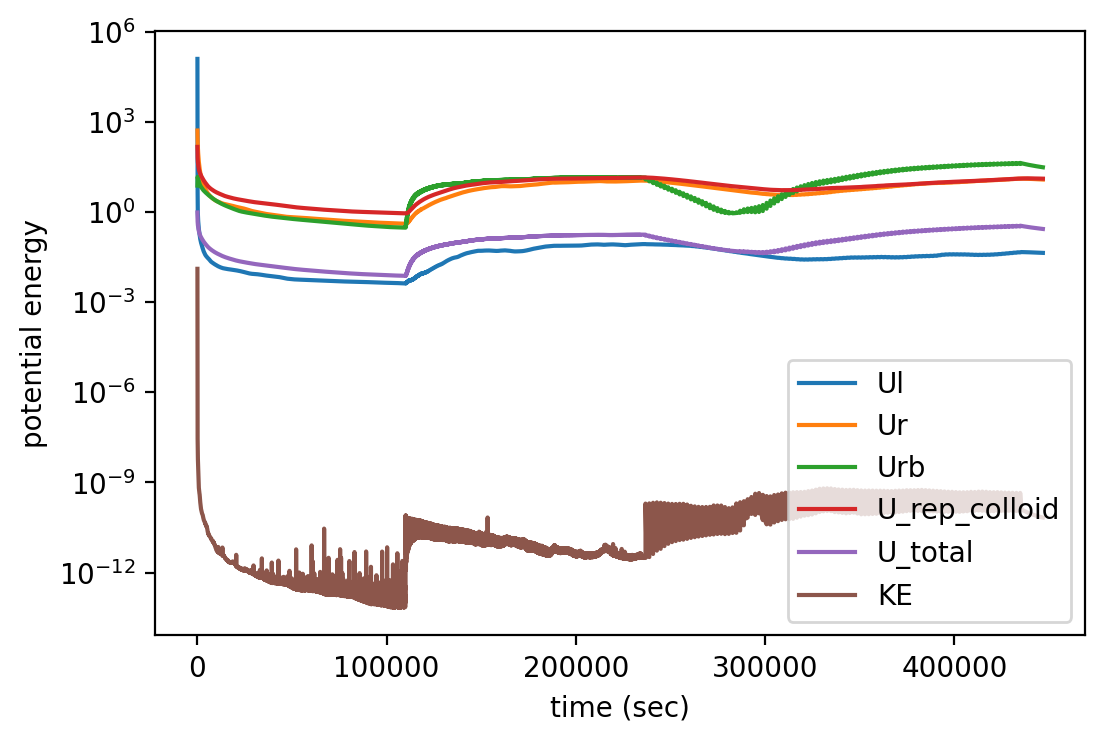

In [7]:
# This code will take a couple minutes to run.
result, CF_sys = plot_folder_result_deformation(
    'deform_data/NcRan_constantF/SimResults_Nc_160_Np_10_Nf_324_volfrac_0.83_filfrac_0.7_solver_bdf_mLf6.4_deform_hardBC_constantF_15_seed0/', copy_number0 = 0, 
    save_file_name = 'deform_Nc160_Nf324_seed0_constantF_forplotting')

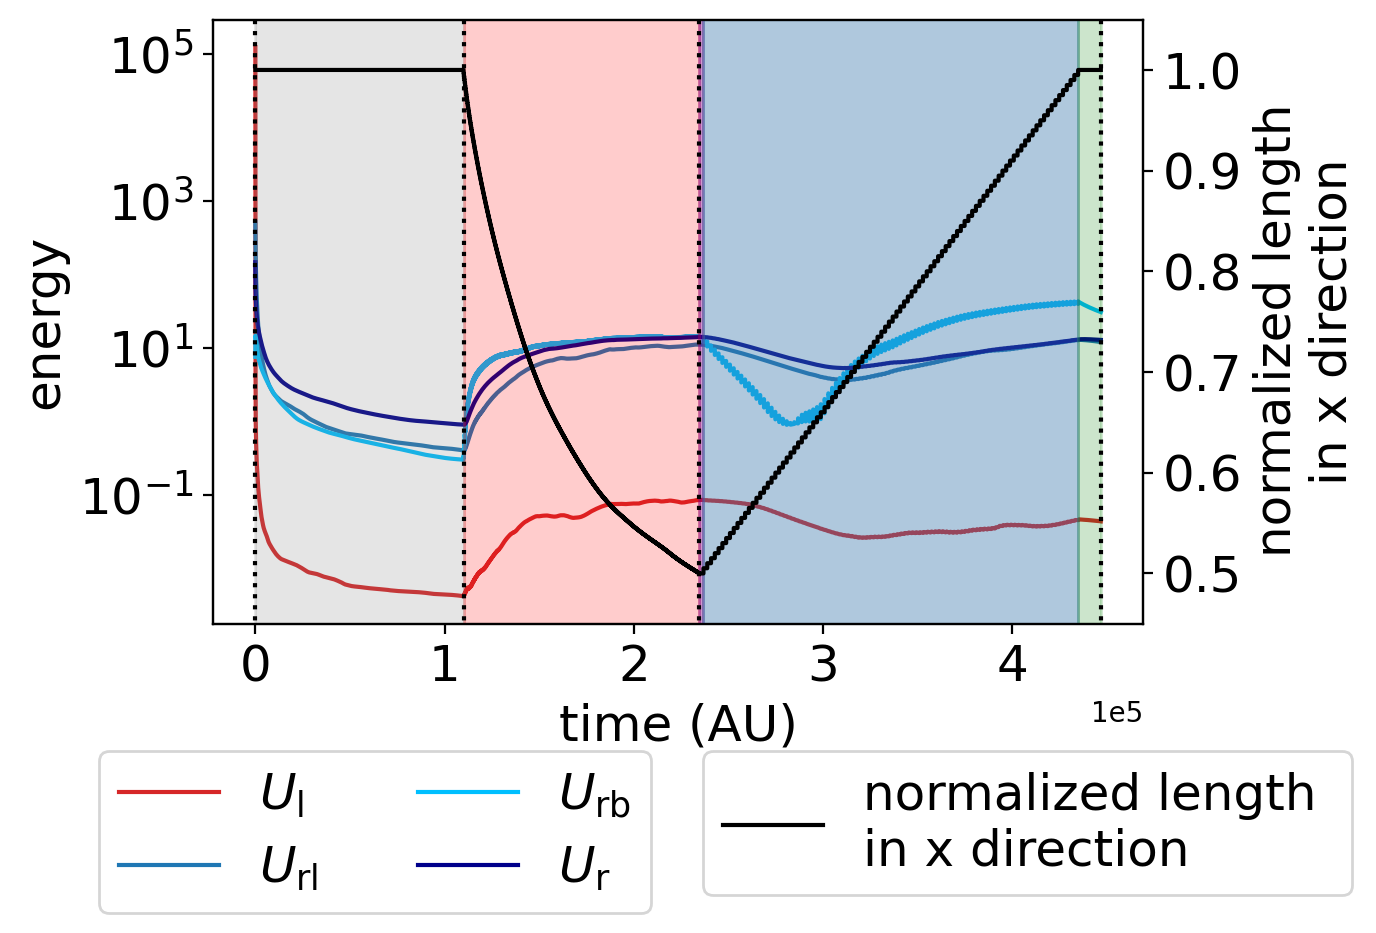

In [8]:
idx0 = 0
site0 = result['ts'][0]
idx1 = np.min(np.where(np.array(result['shrinkage_arr'])<1))
site1 = result['ts'][idx1]
idx2 = np.min(np.where(np.array(result['shrinkage_arr'])<=0.5))
site2 = result['ts'][idx2]
idx25 = np.max(np.where(np.array(result['shrinkage_arr'])<=0.5))
site25 = result['ts'][idx25]
idx3 = np.max(np.where(np.array(result['shrinkage_arr'])<1))
site3 = result['ts'][idx3]
idx4 = len(result['ts']) - 1
site4 = result['ts'][-1]

fig, ax1 = plt.subplots(dpi = 200)
ax2 = ax1.twinx()
ax1.plot(result['ts'], result['Ul_arr'], label = r'$U_{\rm{l}}$', color = 'C3')
ax1.plot(result['ts'], result['Ur_arr'], label = r'$U_{\rm{rl}}$', color = 'C0')
ax1.plot(result['ts'], result['Urb_arr'], label = r'$U_{\rm{rb}}$', color = 'deepskyblue')
ax1.plot(result['ts'], result['U_rep_arr'], label = r'$U_{\rm{r}}$', color = 'darkblue')
ax1.set_xlabel('time (AU)', fontsize=18)
ax1.set_ylabel('energy', fontsize=18)
ax1.set_yscale('log')
plt.ticklabel_format(axis = 'x', style = 'sci', scilimits=(0,0))
ax1.tick_params(axis='both', which='major', labelsize=18)
ax1.legend(bbox_to_anchor=(-0.15,-0.17),loc = 'upper left', ncol = 2, fontsize = 18)
ax2.plot(result['ts'], result['shrinkage_arr'], label = 'normalized length \nin x direction', color = 'black')
ax2.set_ylabel('normalized length \nin x direction', fontsize=18)
ax2.vlines(site0, 0.3, 1.5, linestyle = 'dotted', color = 'black')
ax2.vlines(site1, 0.3, 1.5, linestyle = 'dotted', color = 'black')
ax2.vlines(site2, 0.3, 1.5, linestyle = 'dotted', color = 'black')
ax2.vlines(site4, 0.3, 1.5, linestyle = 'dotted', color = 'black')
ax2.fill_betweenx(
    [0.3, 1.5], site0, site1, 
    alpha = 0.2, color = 'gray')
ax2.fill_betweenx(
    [0.3, 1.5], site1, site2, 
    alpha = 0.2, color = 'red')
ax2.fill_betweenx(
    [0.3, 1.5], site2, site25, 
    alpha = 0.4, color = 'purple')
ax2.fill_betweenx(
    [0.3, 1.5], site25, site3, 
    alpha = 0.4, color = '#3776ab')
ax2.fill_betweenx(
    [0.3, 1.5], site3, site4, 
    alpha = 0.2, color = 'green')
ax2.set_ylim([0.45,1.05])
plt.yticks(fontsize=18)
plt.legend(bbox_to_anchor = (0.50,-0.17), loc = 'upper left', fontsize = 18)
plt.savefig('output_figure/Fig3C.png', bbox_inches='tight')
plt.show()

Loading Simulation data from disk .......
Loading hdf5 file
Loading Simulation data from disk .......
Loading hdf5 file


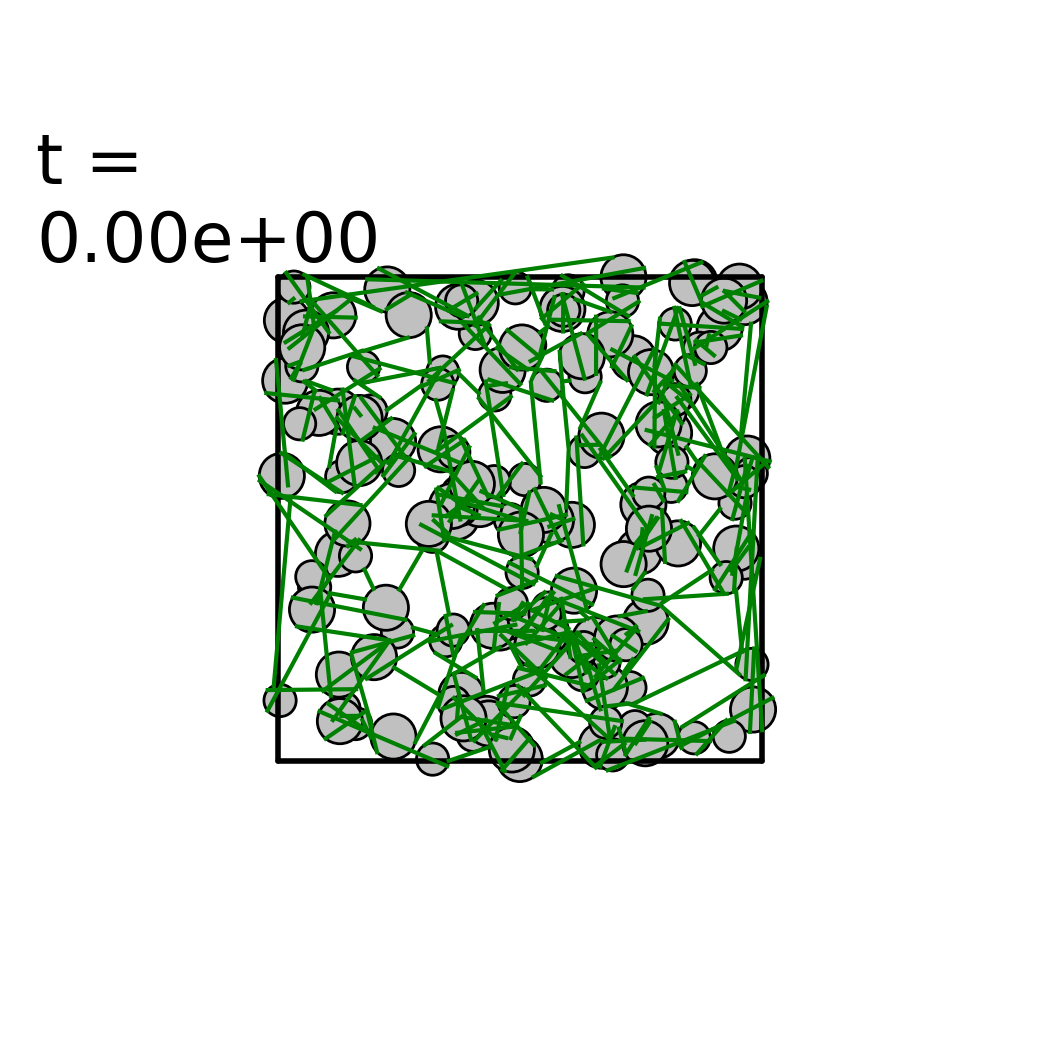

In [9]:
cpnum = 0
frame = 0
CF_draw = plot_single_snapshot(
    folder_name = 'deform_data/NcRan_constantF/SimResults_Nc_160_Np_10_Nf_324_volfrac_0.83_filfrac_0.7_solver_bdf_mLf6.4_deform_hardBC_constantF_15_seed0/', 
    copy_number = cpnum, frame = frame)
CF_draw.plot_system(string_color = 'green')
plt.text(-30, 16, 't = \n%s' %"{:.2e}".format(CF_draw.Time[frame]), fontsize = 25)
plt.xlim([-31,31])
plt.ylim([-31,31])
plt.axis('off')
plt.savefig('output_figure/Fig3D(1).tiff')

Loading Simulation data from disk .......
Loading hdf5 file
Loading Simulation data from disk .......
Loading hdf5 file


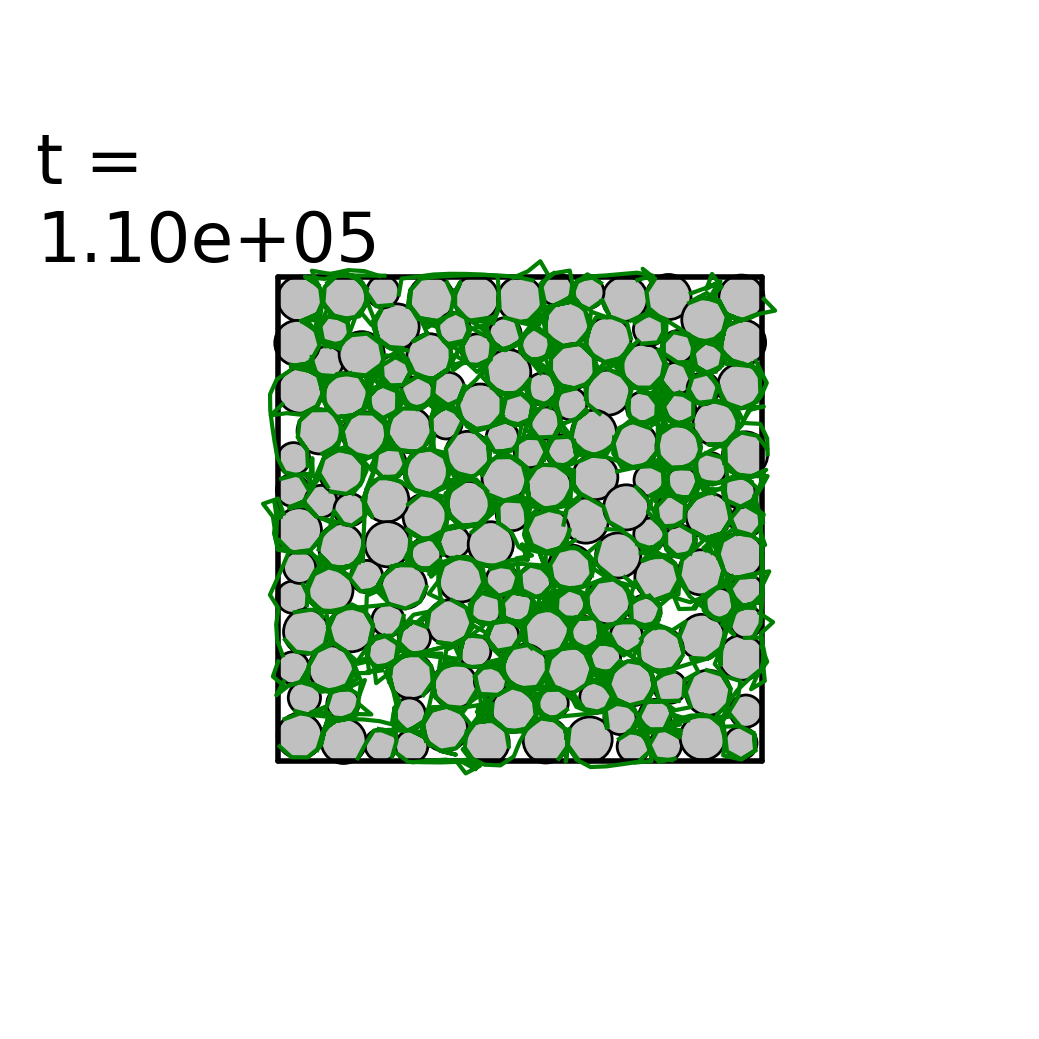

In [10]:
cpnum = 54
frame = -1
CF_draw = plot_single_snapshot(
    folder_name = 'deform_data/NcRan_constantF/SimResults_Nc_160_Np_10_Nf_324_volfrac_0.83_filfrac_0.7_solver_bdf_mLf6.4_deform_hardBC_constantF_15_seed0/', 
    copy_number = cpnum, frame = frame)
CF_draw.plot_system(string_color = 'green')
plt.text(-30, 16, 't = \n%s' %"{:.2e}".format(CF_draw.Time[frame]), fontsize = 25)
plt.xlim([-31,31])
plt.ylim([-31,31])
plt.axis('off')
plt.savefig('output_figure/Fig3D(2).tiff')

Loading Simulation data from disk .......
Loading hdf5 file


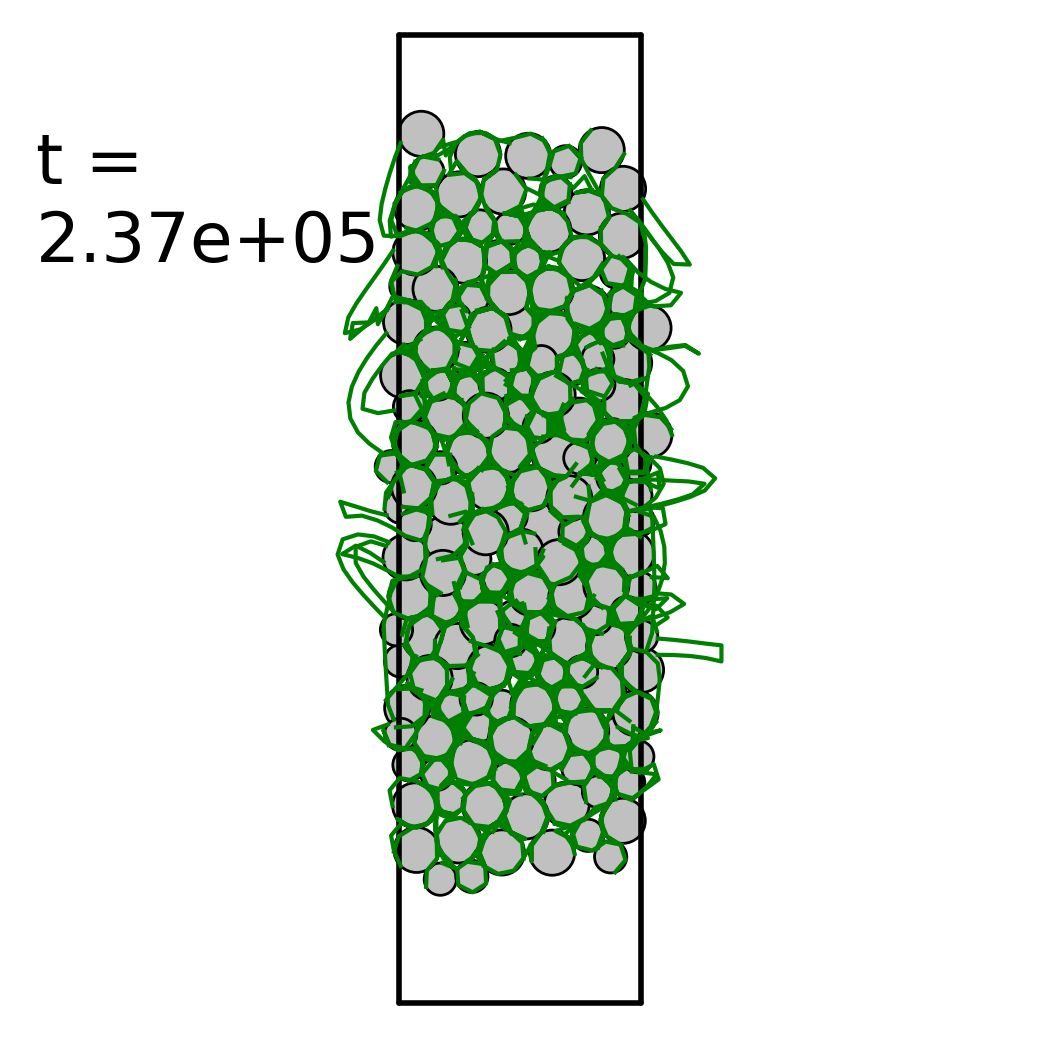

In [11]:
cpnum = 679
frame = -1
CF_draw = plot_single_snapshot(
    folder_name = 'deform_data/NcRan_constantF/SimResults_Nc_160_Np_10_Nf_324_volfrac_0.83_filfrac_0.7_solver_bdf_mLf6.4_deform_hardBC_constantF_15_seed0/', 
    copy_number = cpnum, frame = frame)
CF_draw.plot_system(string_color = 'green')
plt.text(-30, 16, 't = \n%s' %"{:.2e}".format(CF_draw.Time[frame]), fontsize = 25)
plt.xlim([-31,31])
plt.ylim([-31,31])
plt.axis('off')
plt.savefig('output_figure/Fig3D(3).tiff')

Loading Simulation data from disk .......
Loading hdf5 file


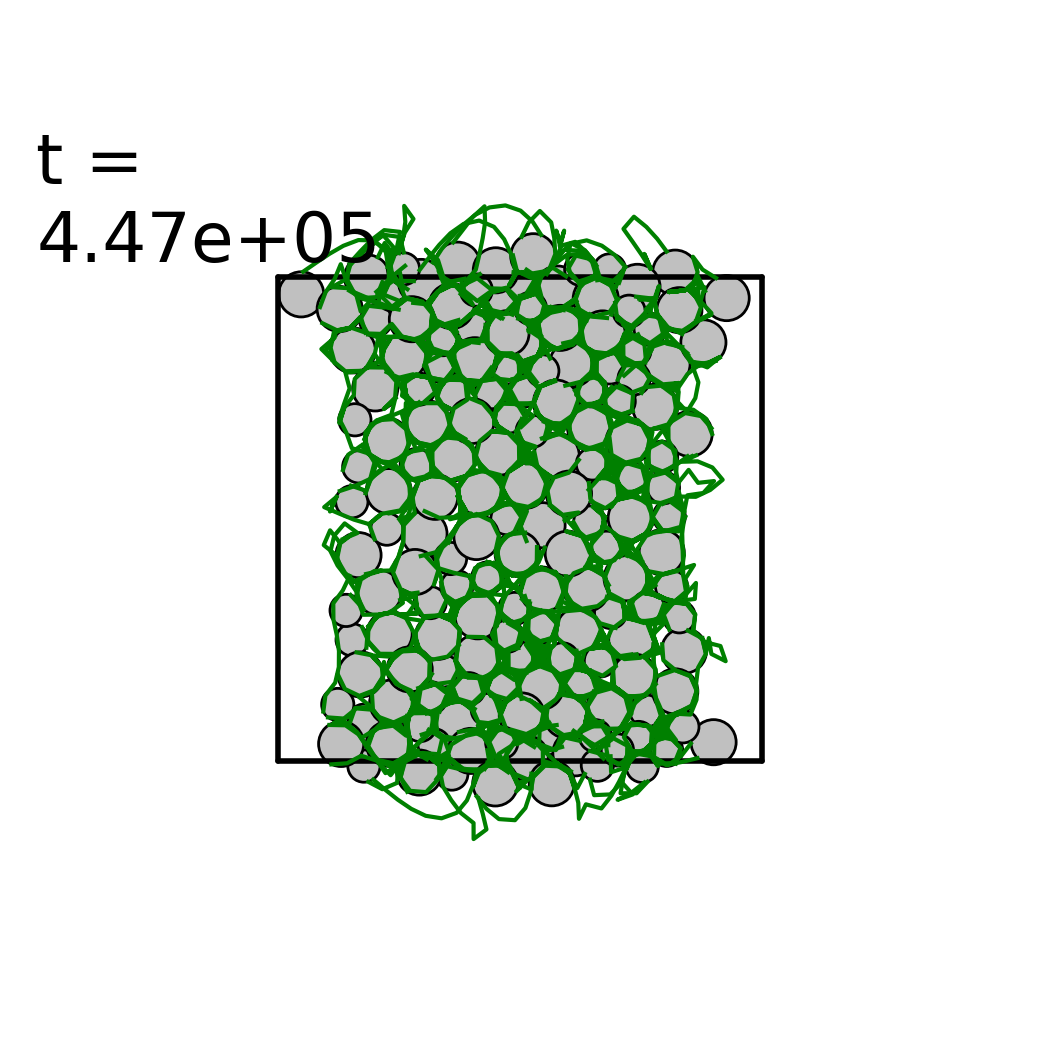

In [12]:
cpnum = 784
frame = -1
CF_draw = plot_single_snapshot(
    folder_name = 'deform_data/NcRan_constantF/SimResults_Nc_160_Np_10_Nf_324_volfrac_0.83_filfrac_0.7_solver_bdf_mLf6.4_deform_hardBC_constantF_15_seed0/', 
    copy_number = cpnum, frame = frame)
CF_draw.plot_system(string_color = 'green')
plt.text(-30, 16, 't = \n%s' %"{:.2e}".format(CF_draw.Time[frame]), fontsize = 25)
plt.xlim([-31,31])
plt.ylim([-31,31])
plt.axis('off')
plt.savefig('output_figure/Fig3D(4).tiff')

# Fig 4 & 5

In [13]:
folder_name = 'output_summarized/deform/NcRan/constantF/F15'
result_NcRanConstantF15 = analyze_summarized_folder(folder_name)

Unable to open file (file signature not found)
.DS_Store


It shall print out
```
Unable to open file (file signature not found)
.DS_Store
```
This is normal.

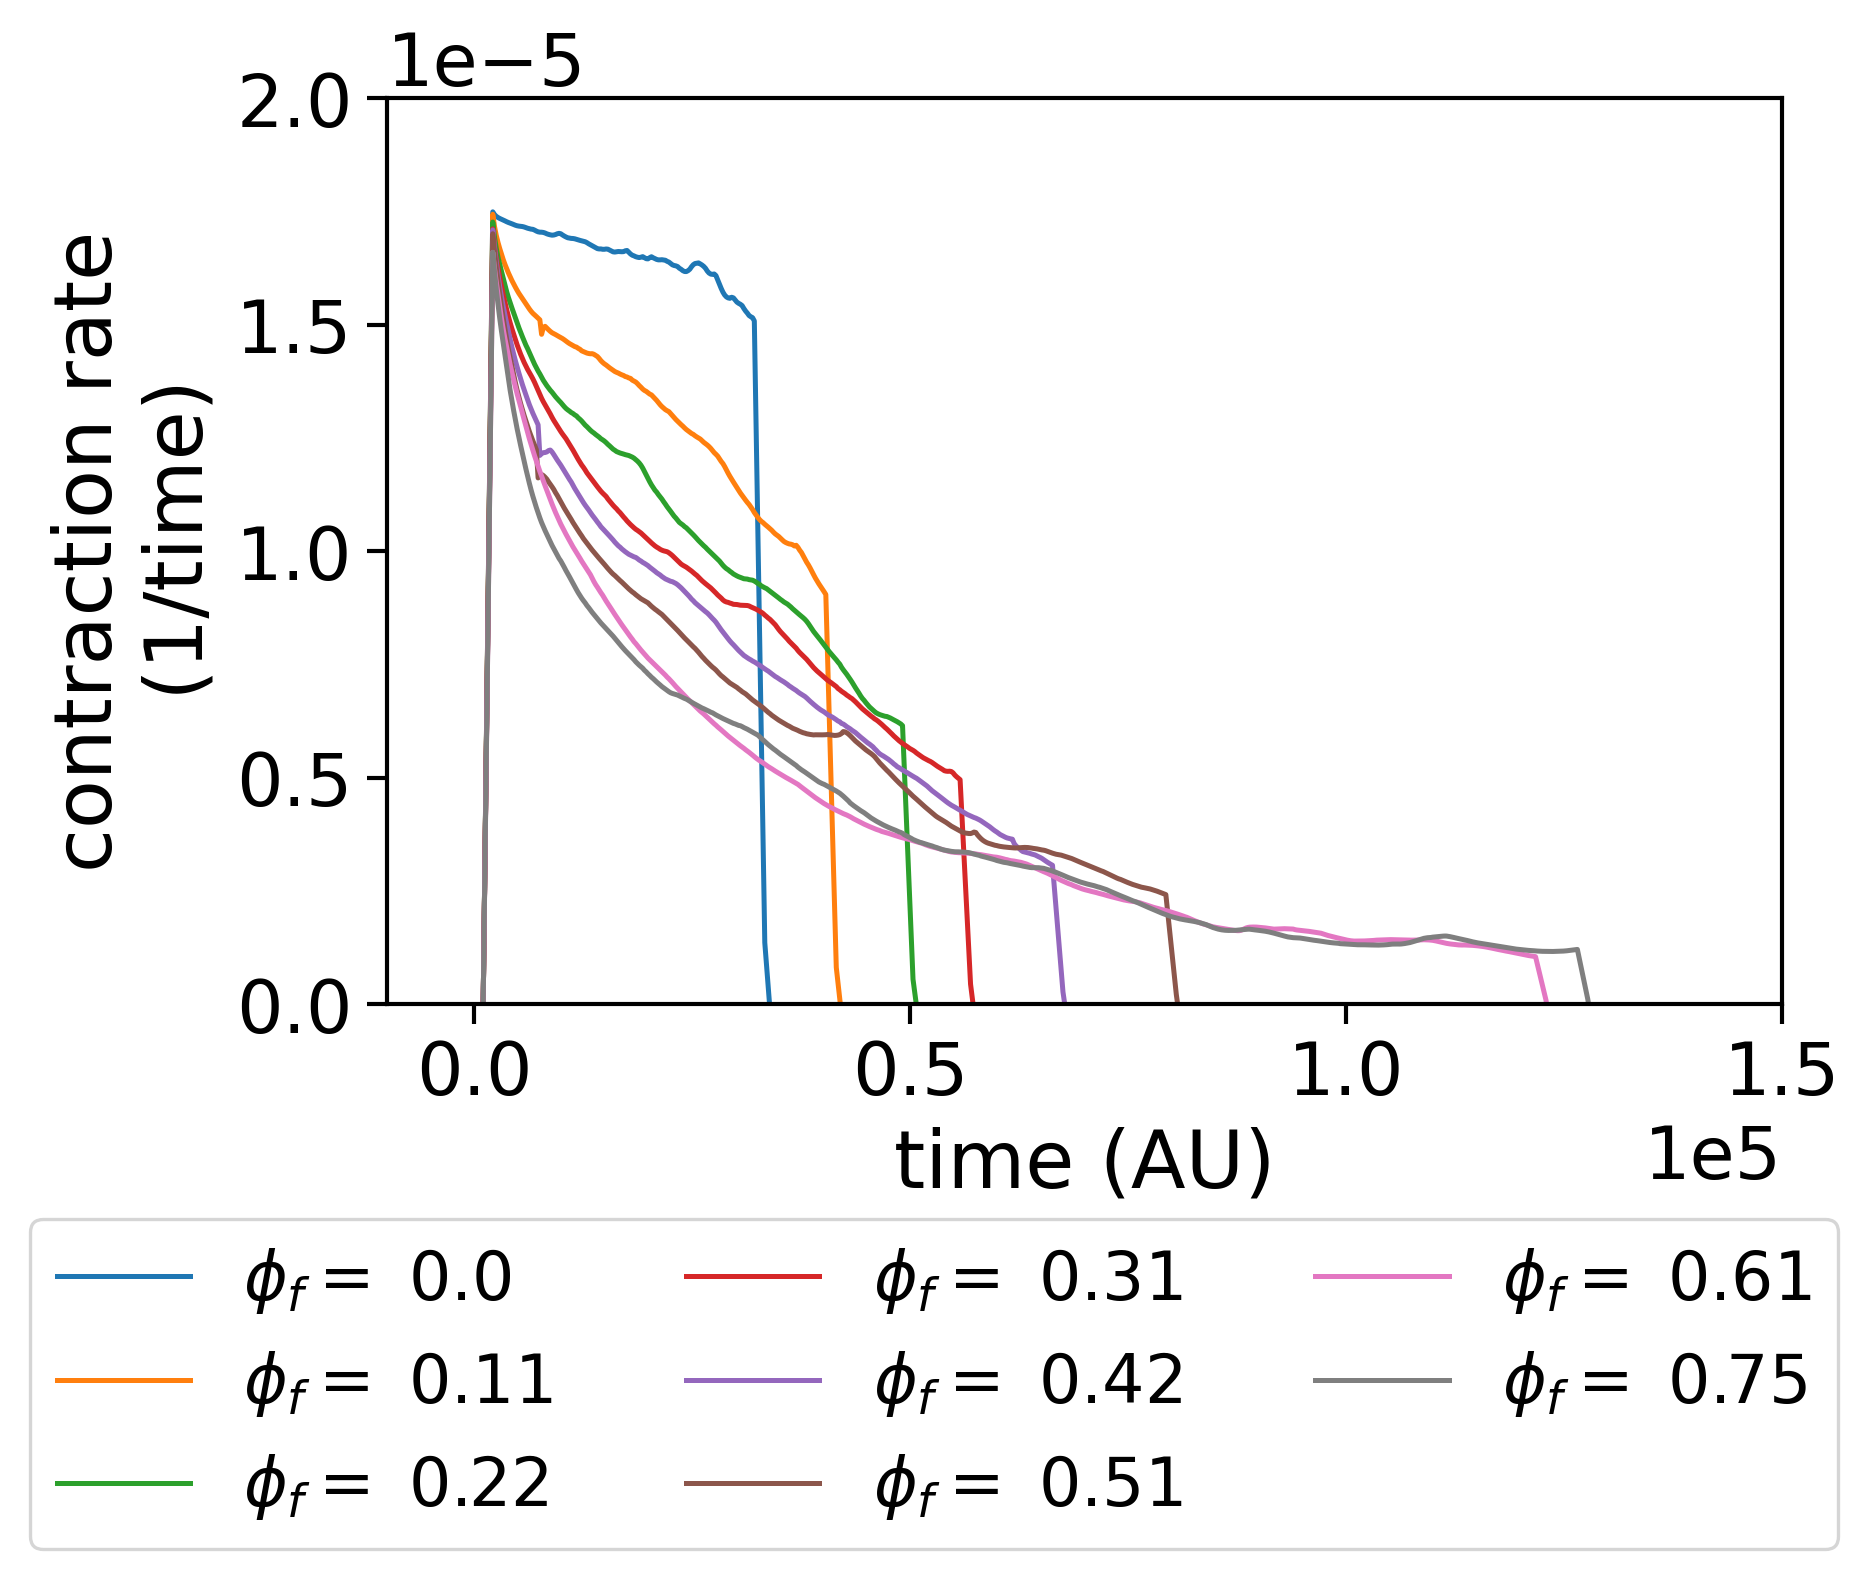

In [14]:
selection_list = [25,46,29,48,44,8,18,35]
selection_list1 = [25,48,35]
result = result_NcRanConstantF15
#fontsize = 12
plt.figure(dpi = 300)
sns.set_context("paper", font_scale = 2)
for i in selection_list:
    shrinkage_temp = result['shrinkage_all'][i]
    time_temp = result['t_correct_all'][i]
    diff_temp = shrinkage_temp[1:] - shrinkage_temp[0:-1]
    [loc_diff] = np.where(diff_temp != 0)
    loc_diff = np.hstack([0, loc_diff, len(shrinkage_temp)-1])
    time_pt = time_temp[loc_diff]
    shrinkage_pt = shrinkage_temp[loc_diff]
    dxdt = (shrinkage_pt[1:] - shrinkage_pt[0:-1])/(time_pt[1:] - time_pt[0:-1])
    time_for_dxdt = (time_pt[1:] + time_pt[0:-1])/2
    [loc_0], = np.where(dxdt[0:-1]*dxdt[1:] < 0)
    if i in selection_list1:
        plt.plot(time_for_dxdt[0:loc_0+2], dxdt[0:loc_0+2], label = r'$\phi_f = $ %s'%round(result['fil_frac_all'][i],2))
    else:
        plt.plot(time_for_dxdt[0:loc_0+2], dxdt[0:loc_0+2], label = r'$\phi_f = $ %s'%round(result['fil_frac_all'][i],2))
plt.legend(ncol=3, bbox_to_anchor=(-0.28, -0.20), loc='upper left', fontsize = 16)
plt.hlines(0,0,350000, linestyle = '--', color ='black')
plt.xlabel('time (AU)')
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.ylabel('contraction rate\n (1/time)')
plt.xlim([-10000,150000])
plt.ylim([0, 2e-5])
plt.savefig('output_figure/Fig4A.png', bbox_inches='tight')

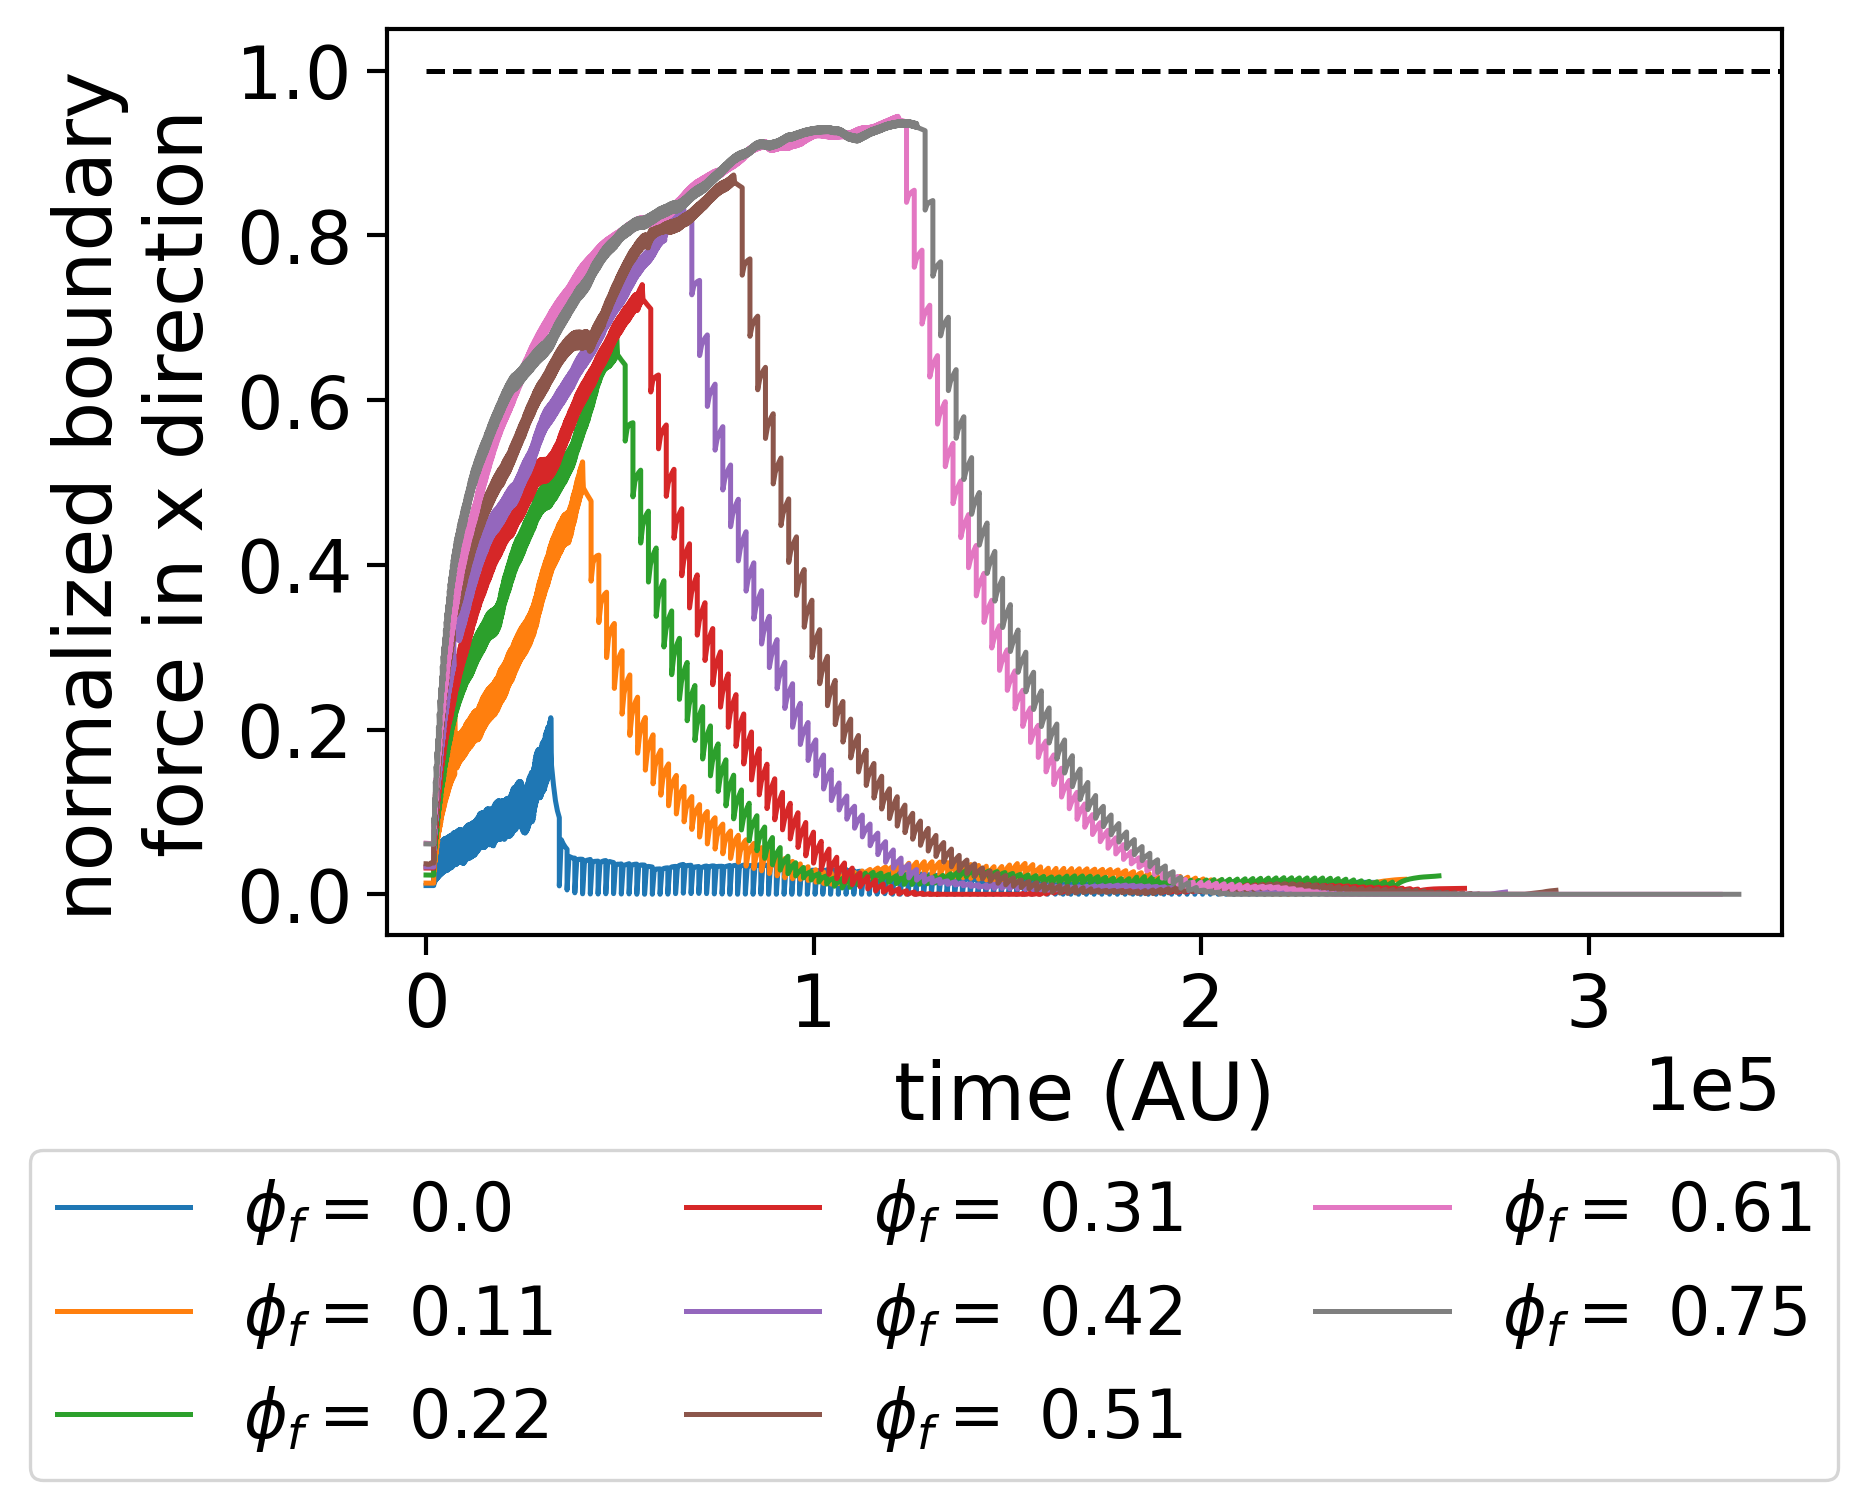

In [15]:
selection_list = [25,46,29,48,44,8,18,35]
plt.figure(dpi = 300)
sns.set_context("paper", font_scale = 2)
for i in selection_list:
    plt.plot(result_NcRanConstantF15['t_correct_all'][i], 
             result_NcRanConstantF15['Fx_all'][i]/30, 
             label = r'$\phi_f = $ %s'%round(result_NcRanConstantF15['fil_frac_all'][i],2))
plt.legend(ncol=3, bbox_to_anchor=(-0.28, -0.20), loc='upper left', fontsize = 16)
plt.hlines(1,0,350000, linestyle = '--', color ='black')
plt.xlim([-10000,350000])
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.xlabel('time (AU)')
plt.ylabel('normalized boundary \nforce in x direction')
plt.savefig('output_figure/Fig4B.png', bbox_inches='tight')

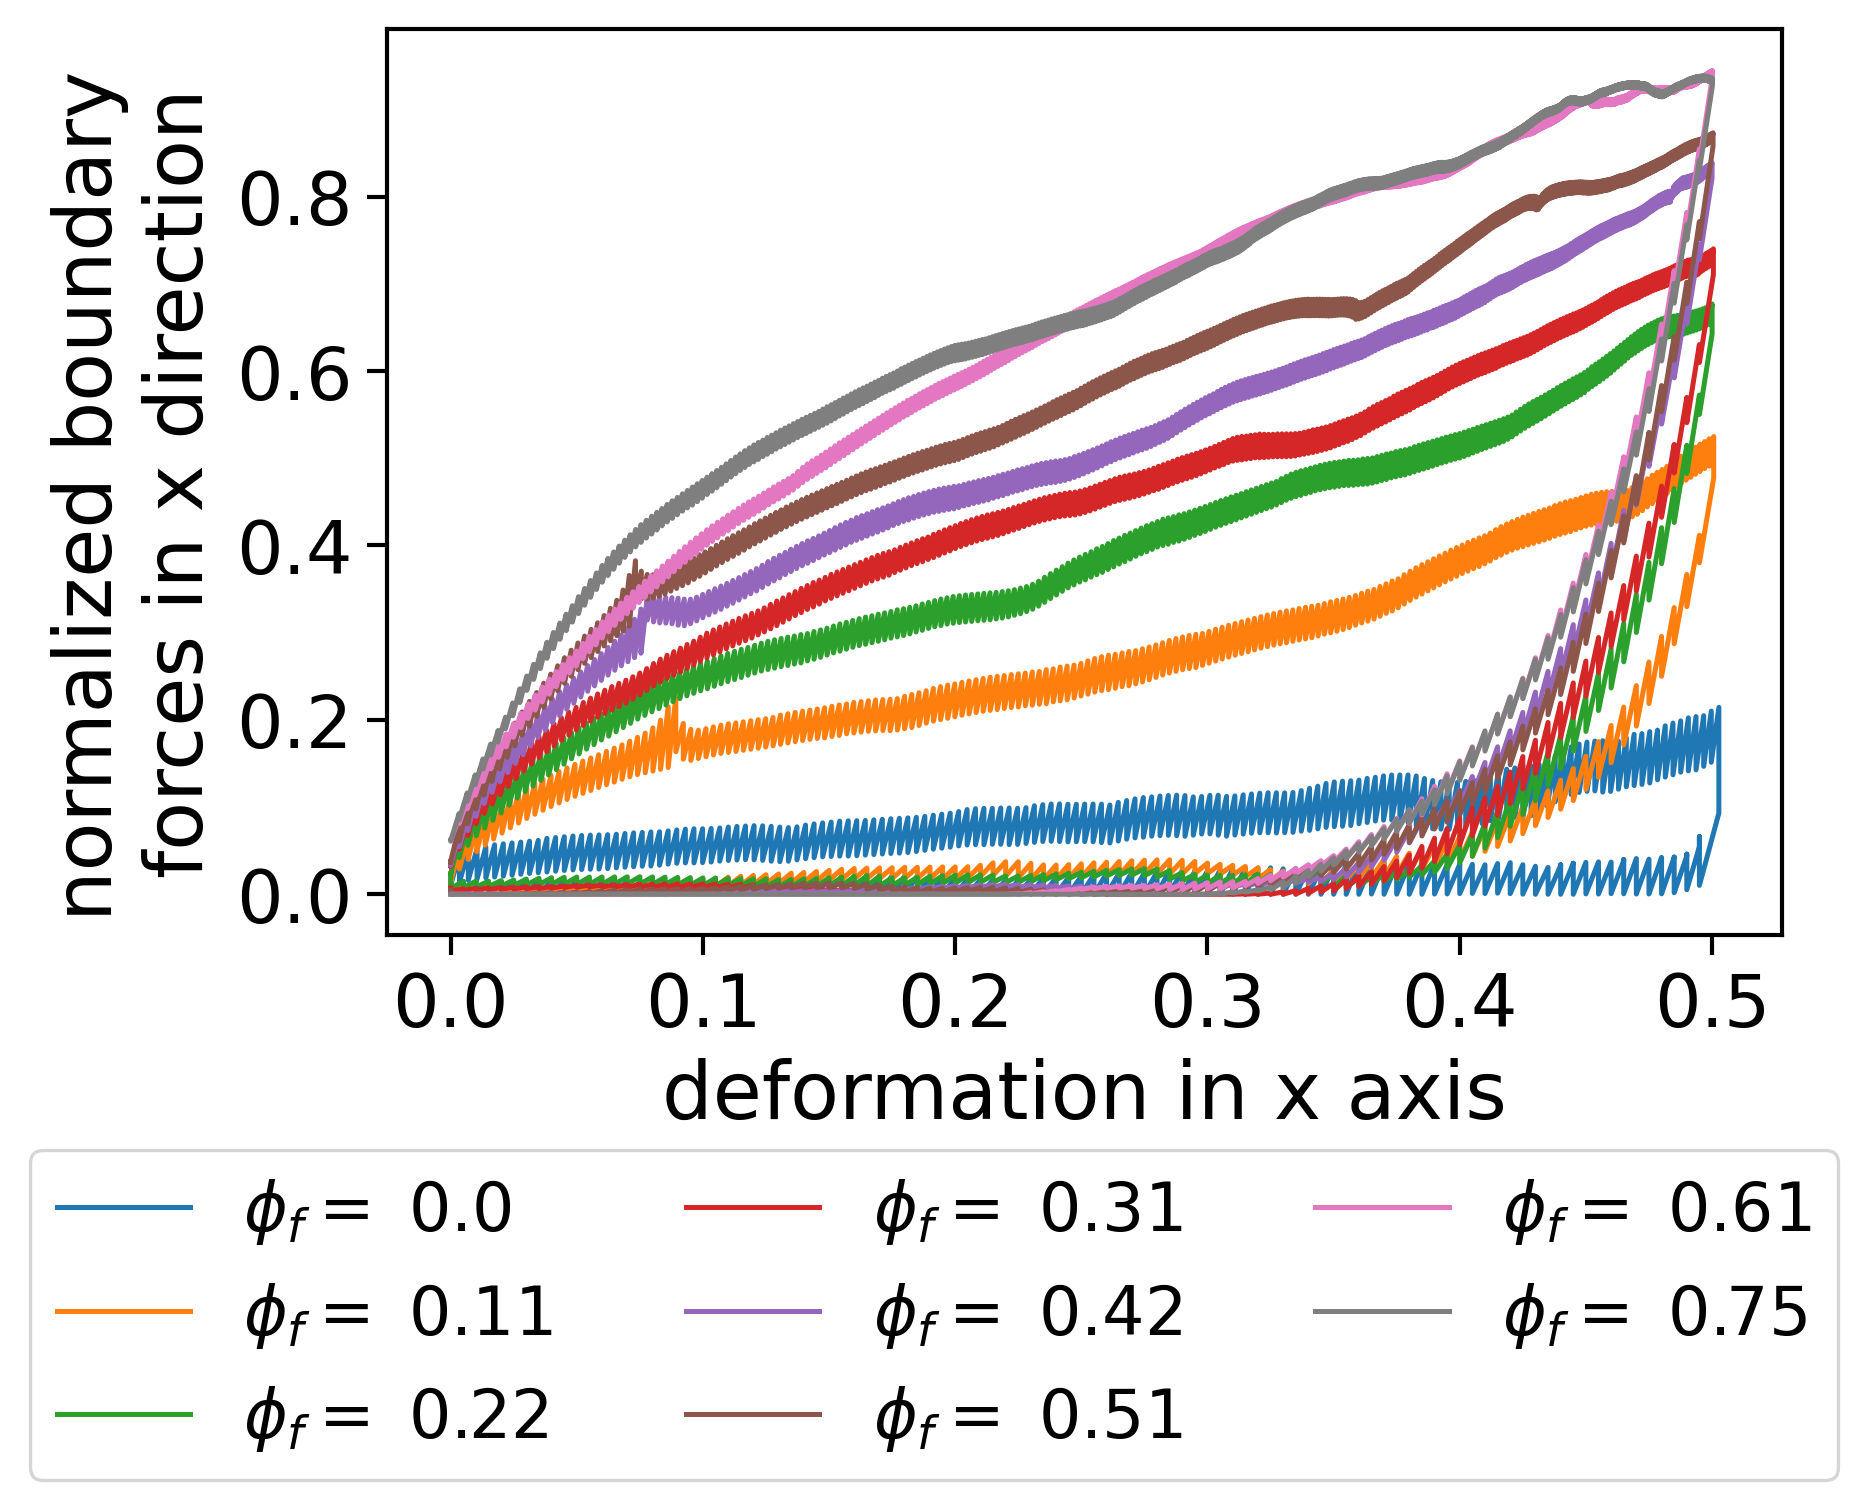

In [16]:
selection_list = [25,46,29,48,44,8,18,35]
result = result_NcRanConstantF15
plt.figure(dpi = 300)
sns.set_context('paper', font_scale = 2)
for i in selection_list:
    plt.plot(result['shrinkage_all'][i], result['Fx_all'][i]/30, label = r'$\phi_f = $ %s'%round(result['fil_frac_all'][i],2))
plt.legend(ncol=3, bbox_to_anchor=(-0.28, -0.20), loc='upper left', fontsize = 16)
plt.xlabel('deformation in x axis')
plt.ylabel('normalized boundary \nforces in x direction')
plt.savefig('output_figure/Fig4C.png', bbox_inches='tight')

50


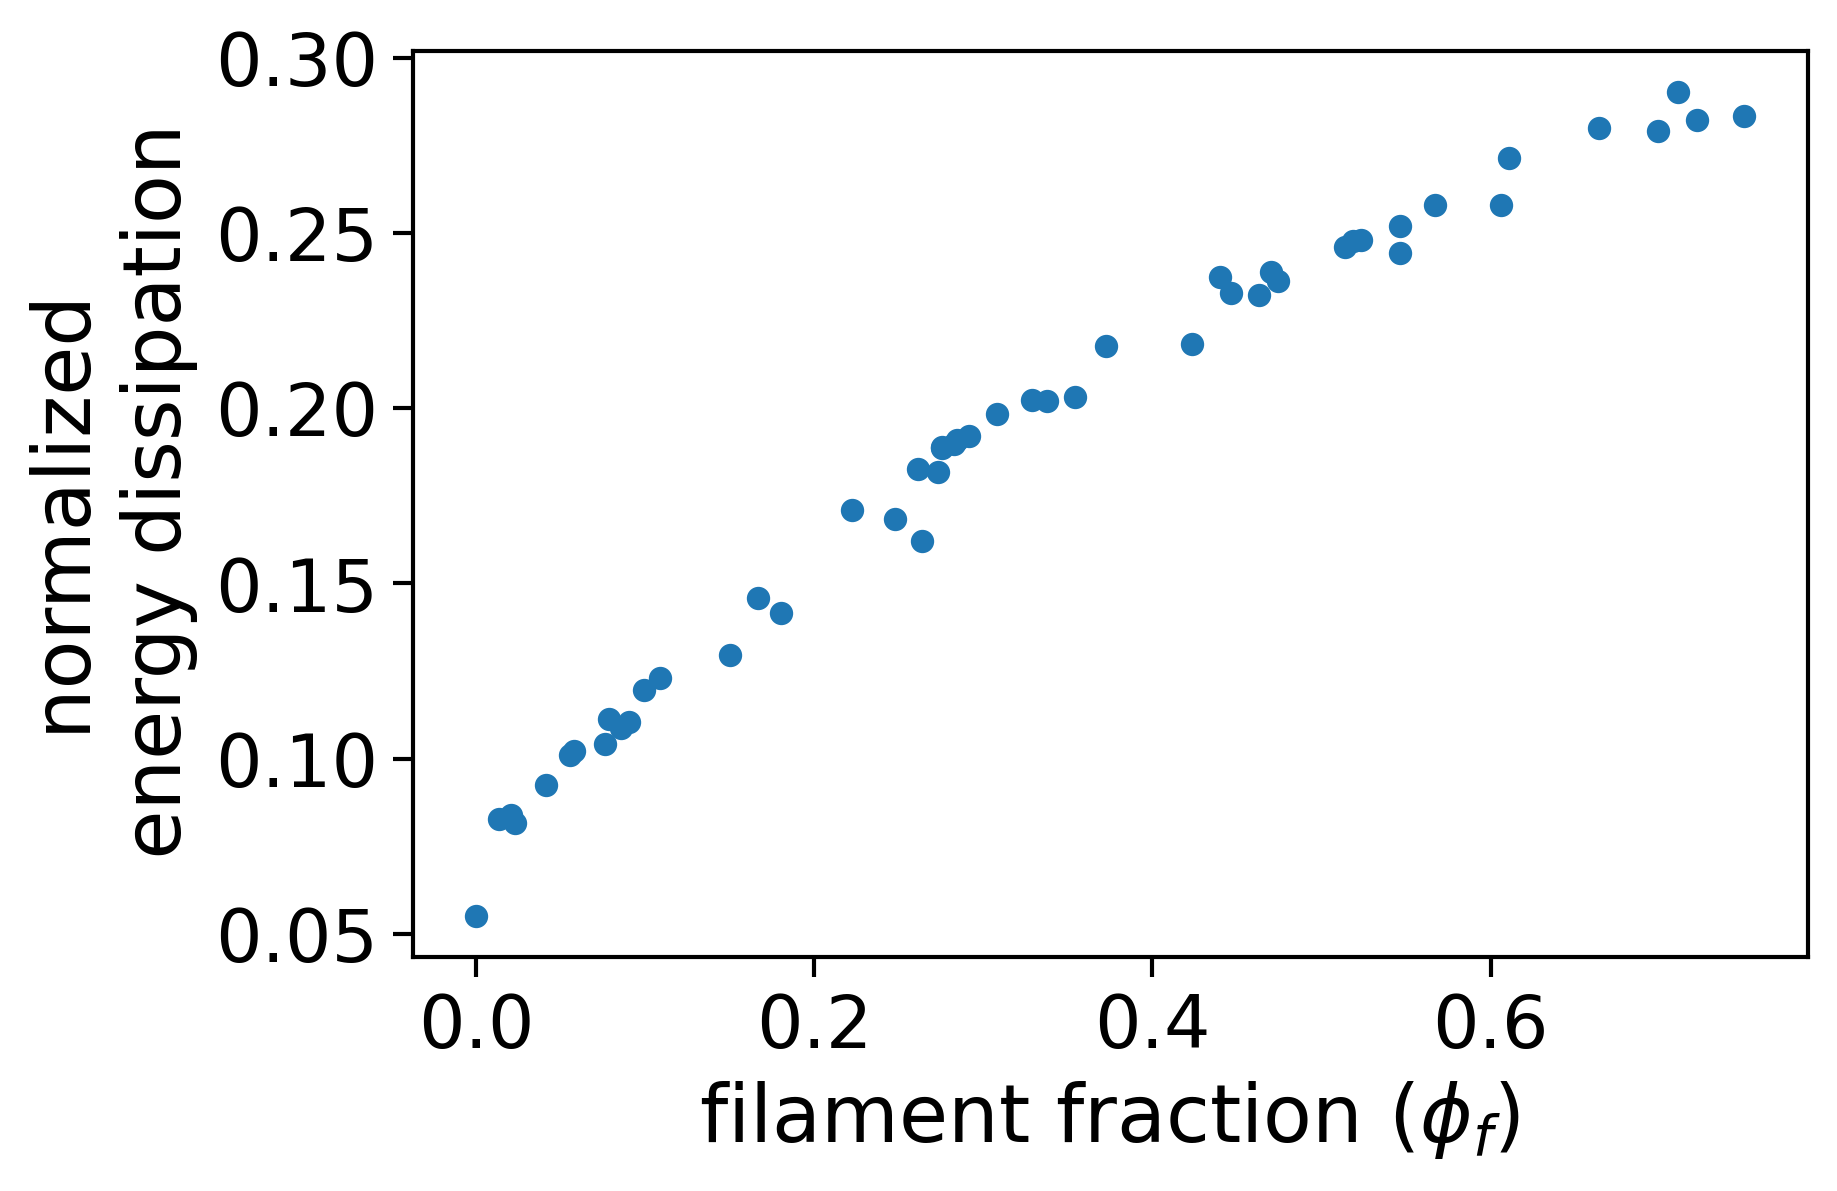

In [17]:
normalized_energy_all = []
for i in range(len(result['Fx_all'])):
    fx = result['Fx_all'][i]/30
    deform = result['shrinkage_all'][i]
    normalized_energy_all.append(np.sum((fx[1:])*(deform[1:]-deform[0:-1])))
print(len(result['Fx_all']))
plt.figure(dpi = 300)
sns.set_context("paper", font_scale = 2)
plt.scatter(result['fil_frac_all'], normalized_energy_all)
plt.xlabel(r'filament fraction ($\phi_f$)')
plt.ylabel('normalized \n energy dissipation')
plt.savefig('output_figure/Fig4D.png', bbox_inches='tight')

Loading Simulation data from disk .......
Loading hdf5 file
464
446
Loading Simulation data from disk .......
Loading hdf5 file
464
446
0.44170403587443946


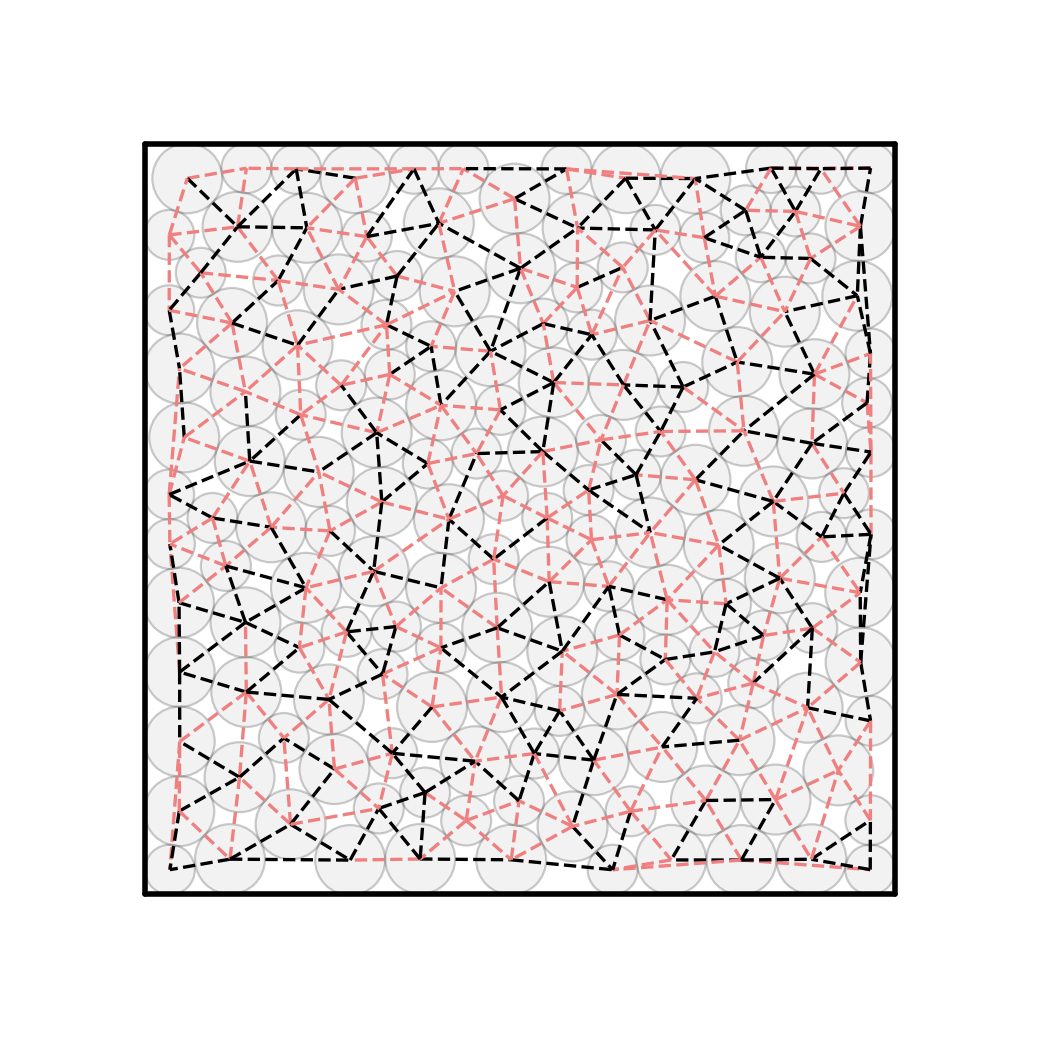

In [18]:
canvas_initial_xy = np.array([[-15, -15], [15, -15], [15, 15], [-15, 15]])
CF_sys2 = rs.Colloid_and_Filament(Nc = 160, Nf = 0, 
                            canvas_initial_xy = canvas_initial_xy, random_init = False, mLf = 6,
                            periodic_bc = False, full_repulsion = True, seed = 0)
CF_sys2.load_data(
    file = 'deform_data/NcRan_constantF/SimResults_Nc_160_Np_10_Nf_0_volfrac_0.83_filfrac_0.0_solver_bdf_mLf6.4_deform_hardBC_constantF_15_seed1/SimResults_{0:03d}.hdf5'.format(69))
CF_sys2.change_r_expanded(CF_sys2.R[:,-1].flatten())
vor1 = Voronoi(CF_sys2.r_matrix)
rp1 = (np.sort(vor1.ridge_points)).tolist()

print(len(rp1))
dist_rp = np.sqrt(np.sum((vor1.points[vor1.ridge_points[:,0], :] - vor1.points[vor1.ridge_points[:,1], :])**2, axis = 1))
threshold = CF_sys2.Rc*CF_sys2.bidisperse*4
[drop_list] = np.where(dist_rp > threshold)
drop_list = np.flip(drop_list)
for drop in drop_list:
    rp1.pop(drop)
print(len(rp1))


#for edge in vor.ridge_points:
#    plt.plot(CF_sys2.r_matrix[edge,0], CF_sys2.r_matrix[edge,1], color = 'black', linestyle = '--')
CF_sys2.load_data(
    file = 'deform_data/NcRan_constantF/SimResults_Nc_160_Np_10_Nf_0_volfrac_0.83_filfrac_0.0_solver_bdf_mLf6.4_deform_hardBC_constantF_15_seed1/SimResults_{0:03d}.hdf5'.format(327))
CF_sys2.change_r_expanded(CF_sys2.R[:,-1].flatten())
vor2 = Voronoi(CF_sys2.r_matrix)
rp2 = (np.sort(vor2.ridge_points)).tolist()

print(len(rp2))
dist_rp = np.sqrt(np.sum((vor2.points[vor2.ridge_points[:,0], :] - vor2.points[vor2.ridge_points[:,1], :])**2, axis = 1))
threshold = CF_sys2.Rc*CF_sys2.bidisperse*4
[drop_list] = np.where(dist_rp > threshold)
drop_list = np.flip(drop_list)
for drop in drop_list:
    rp2.pop(drop)
print(len(rp2))

CF_sys2.plot_system(alpha_colloid = 0.2)
preserved = 0
for rp in rp2:
    if rp in rp1:
        preserved += 1
        plt.plot(CF_sys2.r_matrix[rp,0], CF_sys2.r_matrix[rp,1], color = 'black', linestyle = '--')
    else:
        plt.plot(CF_sys2.r_matrix[rp,0], CF_sys2.r_matrix[rp,1], color = 'lightcoral', linestyle = '--')
print(preserved/len(rp2))

plt.axis('off')
plt.xlim([-20,20])
plt.ylim([-20,20])
plt.savefig('output_figure/Fig4E1.png', bbox_inches='tight')

Loading Simulation data from disk .......
Loading hdf5 file
458
446
Loading Simulation data from disk .......
Loading hdf5 file
465
446
0.7713004484304933


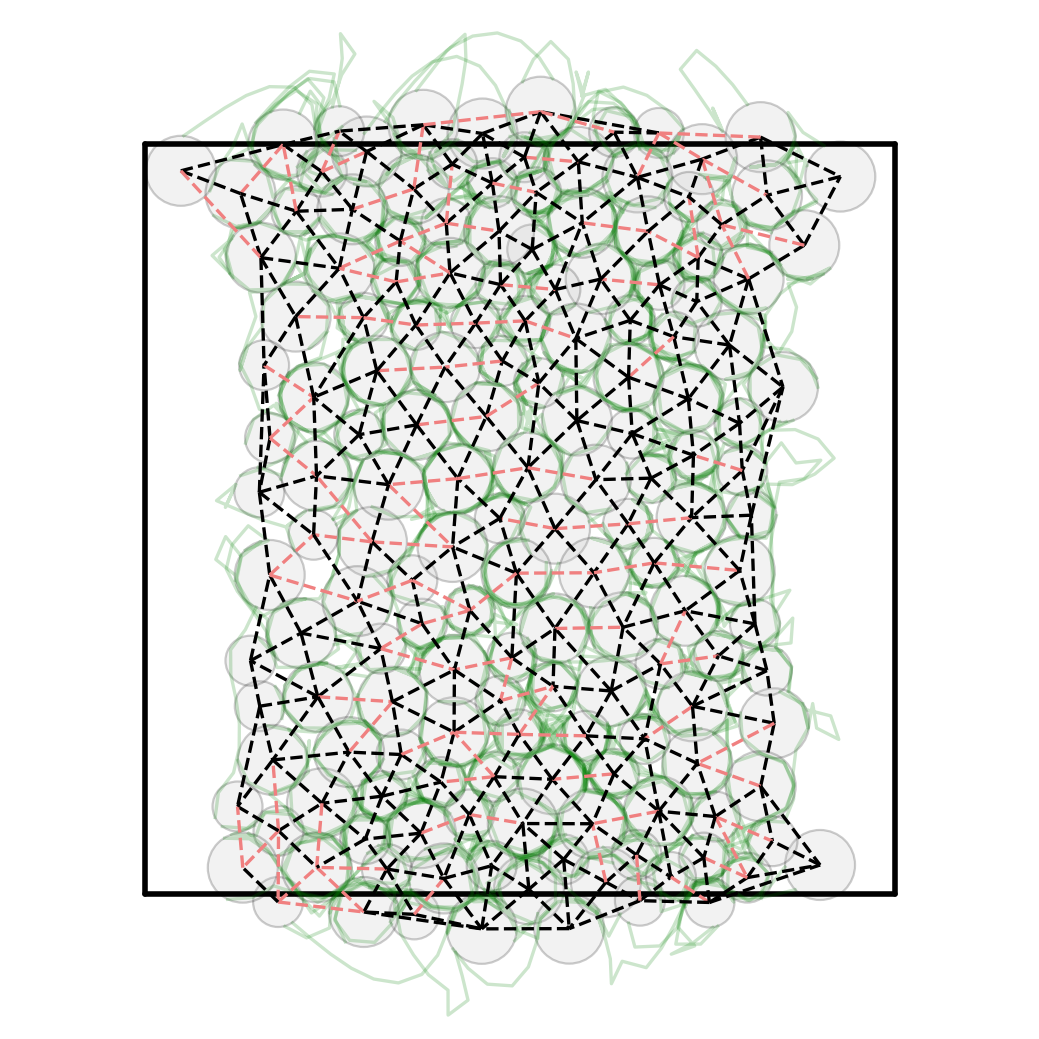

In [19]:
canvas_initial_xy = np.array([[-15, -15], [15, -15], [15, 15], [-15, 15]])
CF_sys2 = rs.Colloid_and_Filament(Nc = 160, Nf = 324, 
                            canvas_initial_xy = canvas_initial_xy, random_init = False, mLf = 6,
                            periodic_bc = False, full_repulsion = True, seed = 0)
CF_sys2.load_data(
    file = 'deform_data/NcRan_constantF/SimResults_Nc_160_Np_10_Nf_324_volfrac_0.83_filfrac_0.7_solver_bdf_mLf6.4_deform_hardBC_constantF_15_seed0/SimResults_{0:03d}.hdf5'.format(54))
CF_sys2.change_r_expanded(CF_sys2.R[:,-1].flatten())
vor1 = Voronoi(CF_sys2.r_matrix)
rp1 = (np.sort(vor1.ridge_points)).tolist()

print(len(rp1))
dist_rp = np.sqrt(np.sum((vor1.points[vor1.ridge_points[:,0], :] - vor1.points[vor1.ridge_points[:,1], :])**2, axis = 1))
threshold = CF_sys2.Rc*CF_sys2.bidisperse*4
[drop_list] = np.where(dist_rp > threshold)
drop_list = np.flip(drop_list)
for drop in drop_list:
    rp1.pop(drop)
print(len(rp1))


#for edge in vor.ridge_points:
#    plt.plot(CF_sys2.r_matrix[edge,0], CF_sys2.r_matrix[edge,1], color = 'black', linestyle = '--')
CF_sys2.load_data(
    file = 'deform_data/NcRan_constantF/SimResults_Nc_160_Np_10_Nf_324_volfrac_0.83_filfrac_0.7_solver_bdf_mLf6.4_deform_hardBC_constantF_15_seed0/SimResults_{0:03d}.hdf5'.format(784))
CF_sys2.change_r_expanded(CF_sys2.R[:,-1].flatten())
vor2 = Voronoi(CF_sys2.r_matrix)
rp2 = (np.sort(vor2.ridge_points)).tolist()

print(len(rp2))
dist_rp = np.sqrt(np.sum((vor2.points[vor2.ridge_points[:,0], :] - vor2.points[vor2.ridge_points[:,1], :])**2, axis = 1))
threshold = CF_sys2.Rc*CF_sys2.bidisperse*4
[drop_list] = np.where(dist_rp > threshold)
drop_list = np.flip(drop_list)
for drop in drop_list:
    rp2.pop(drop)
print(len(rp2))

CF_sys2.plot_system(alpha_colloid = 0.2, alpha_fil = 0.2, string_color = 'green')
preserved = 0
for rp in rp2:
    if rp in rp1:
        preserved += 1
        plt.plot(CF_sys2.r_matrix[rp,0], CF_sys2.r_matrix[rp,1], color = 'black', linestyle = '--')
    else:
        plt.plot(CF_sys2.r_matrix[rp,0], CF_sys2.r_matrix[rp,1], color = 'lightcoral', linestyle = '--')
print(preserved/len(rp2))
plt.gca().set_aspect('equal')
plt.axis('off')
plt.xlim([-20,20])
plt.ylim([-20,20])
plt.savefig('output_figure/Fig4E2.png', bbox_inches='tight')

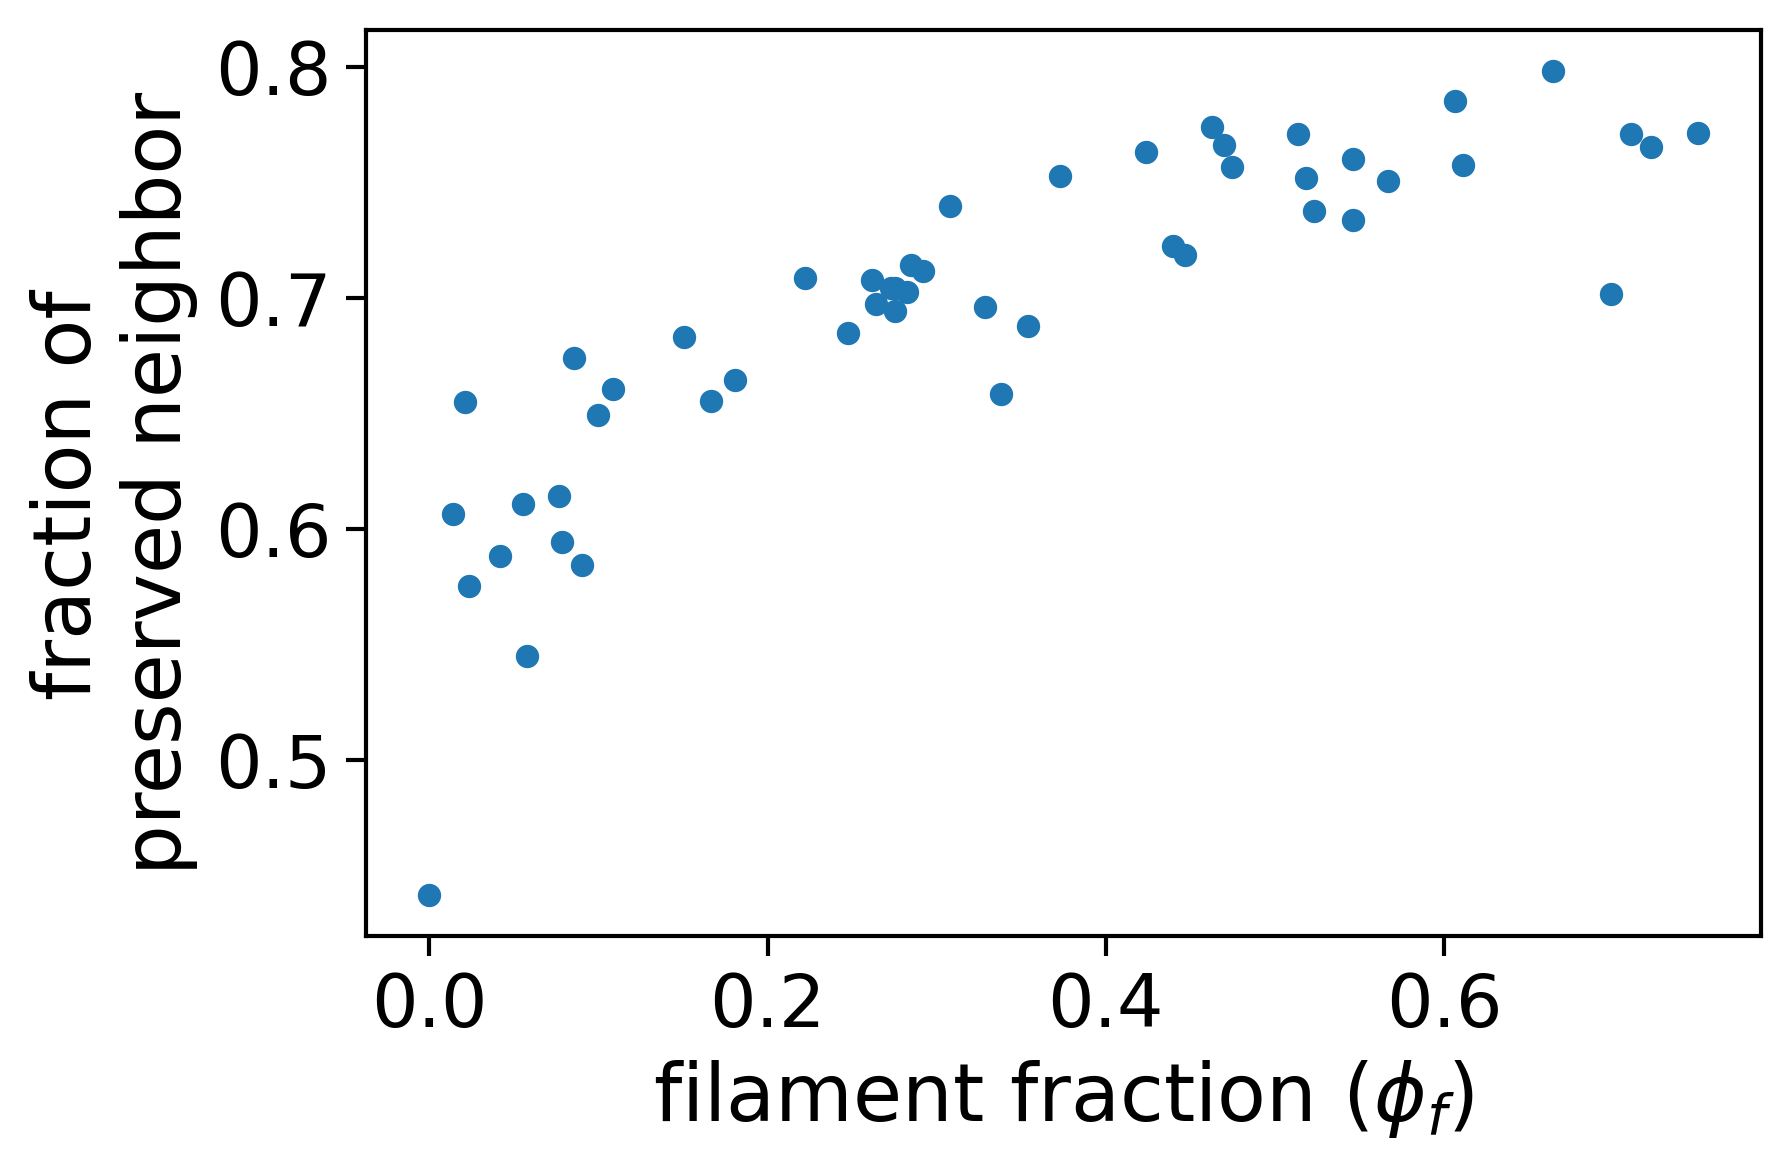

In [20]:
preserved_frac_end_all = []
for i in range(len(result_NcRanConstantF15['Fx_all'])):
    preserved_frac_end_all.append(result_NcRanConstantF15['preserved_fraction_all'][i][-1])

plt.figure(dpi = 300)
sns.set_context("paper", font_scale = 2)
plt.scatter(result_NcRanConstantF15['fil_frac_all'], preserved_frac_end_all)
plt.xlabel(r'filament fraction ($\phi_f$)')
plt.ylabel('fraction of \npreserved neighbor')
plt.savefig('output_figure/Fig4F.png', bbox_inches='tight')

# Figure 5

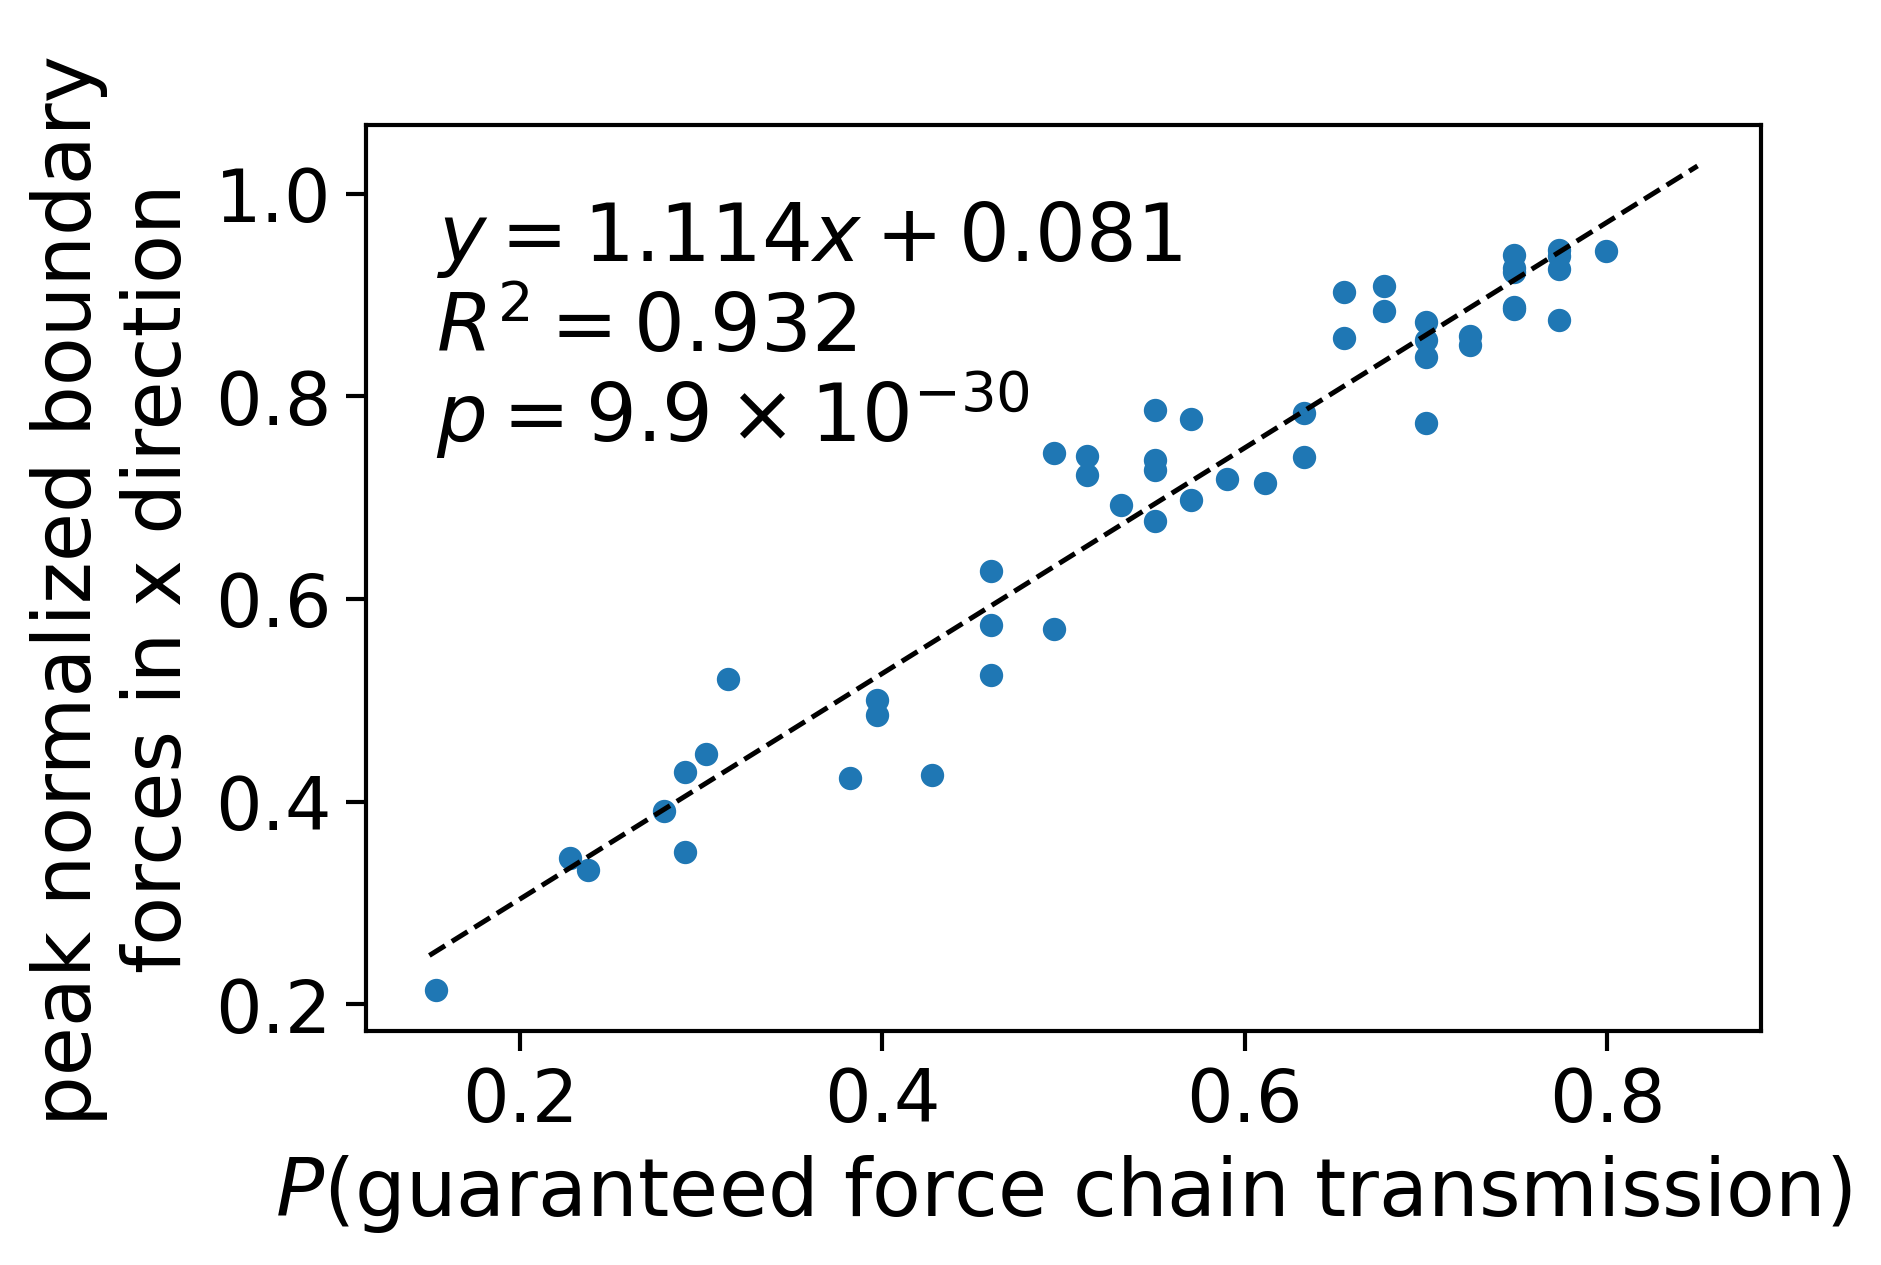

In [21]:
Fx_normalized_all = []
Fx_normalized_peak = []
guestimate_all = []
guestimate_peak_loc = []
guestimate_peak = []
for j in range(len(result_NcRanConstantF15['z_colloid_withwall_below4_all'])):
    loc_max = np.argmax(result_NcRanConstantF15['Fx_all'][j])
    Fx_normalized_all.append((result_NcRanConstantF15['Fx_all'][j]/30)[41:loc_max])
    guestimate_all.append(
        ((1-result_NcRanConstantF15['z_total_filtered_nowall_below4_all'][j])**5*(1-result_NcRanConstantF15['z_colloid_nowall_below4_all'][j])**0)[41:loc_max])
    Fx_normalized_peak.append((result_NcRanConstantF15['Fx_all'][j]/30)[loc_max])
    guestimate_peak_loc.append(
        ((1-result_NcRanConstantF15['z_total_filtered_nowall_below4_all'][j])**5*(1-result_NcRanConstantF15['z_colloid_nowall_below4_all'][j])**0)[loc_max])
    guestimate_peak.append(np.max(
        ((1-result_NcRanConstantF15['z_total_filtered_nowall_below4_all'][j])**5*(1-result_NcRanConstantF15['z_colloid_nowall_below4_all'][j])**0)))
plt.figure(dpi = 300)
sns.set_context('paper', font_scale = 2)
plt.scatter(guestimate_peak_loc, Fx_normalized_peak)
x_plot = np.linspace(0.15,0.85, 100)
plt.plot(x_plot, 1.1135437161357513*x_plot+0.08103368021745216, '--', color = 'black')
plt.xlabel(r'$P$(guaranteed force chain transmission)')
plt.ylabel('peak normalized boundary \nforces in x direction')
linregress(guestimate_peak_loc, Fx_normalized_peak)
ax = plt.gca()
plt.text(0.05, 0.85, r'$y = 1.114x + 0.081$', transform=ax.transAxes)
plt.text(0.05, 0.75, r'$R^2 = 0.932$', transform=ax.transAxes)
plt.text(0.05, 0.65, r'$p=9.9\times 10^{-30}$', transform=ax.transAxes)
plt.savefig('output_figure/Fig5A.png', bbox_inches='tight')

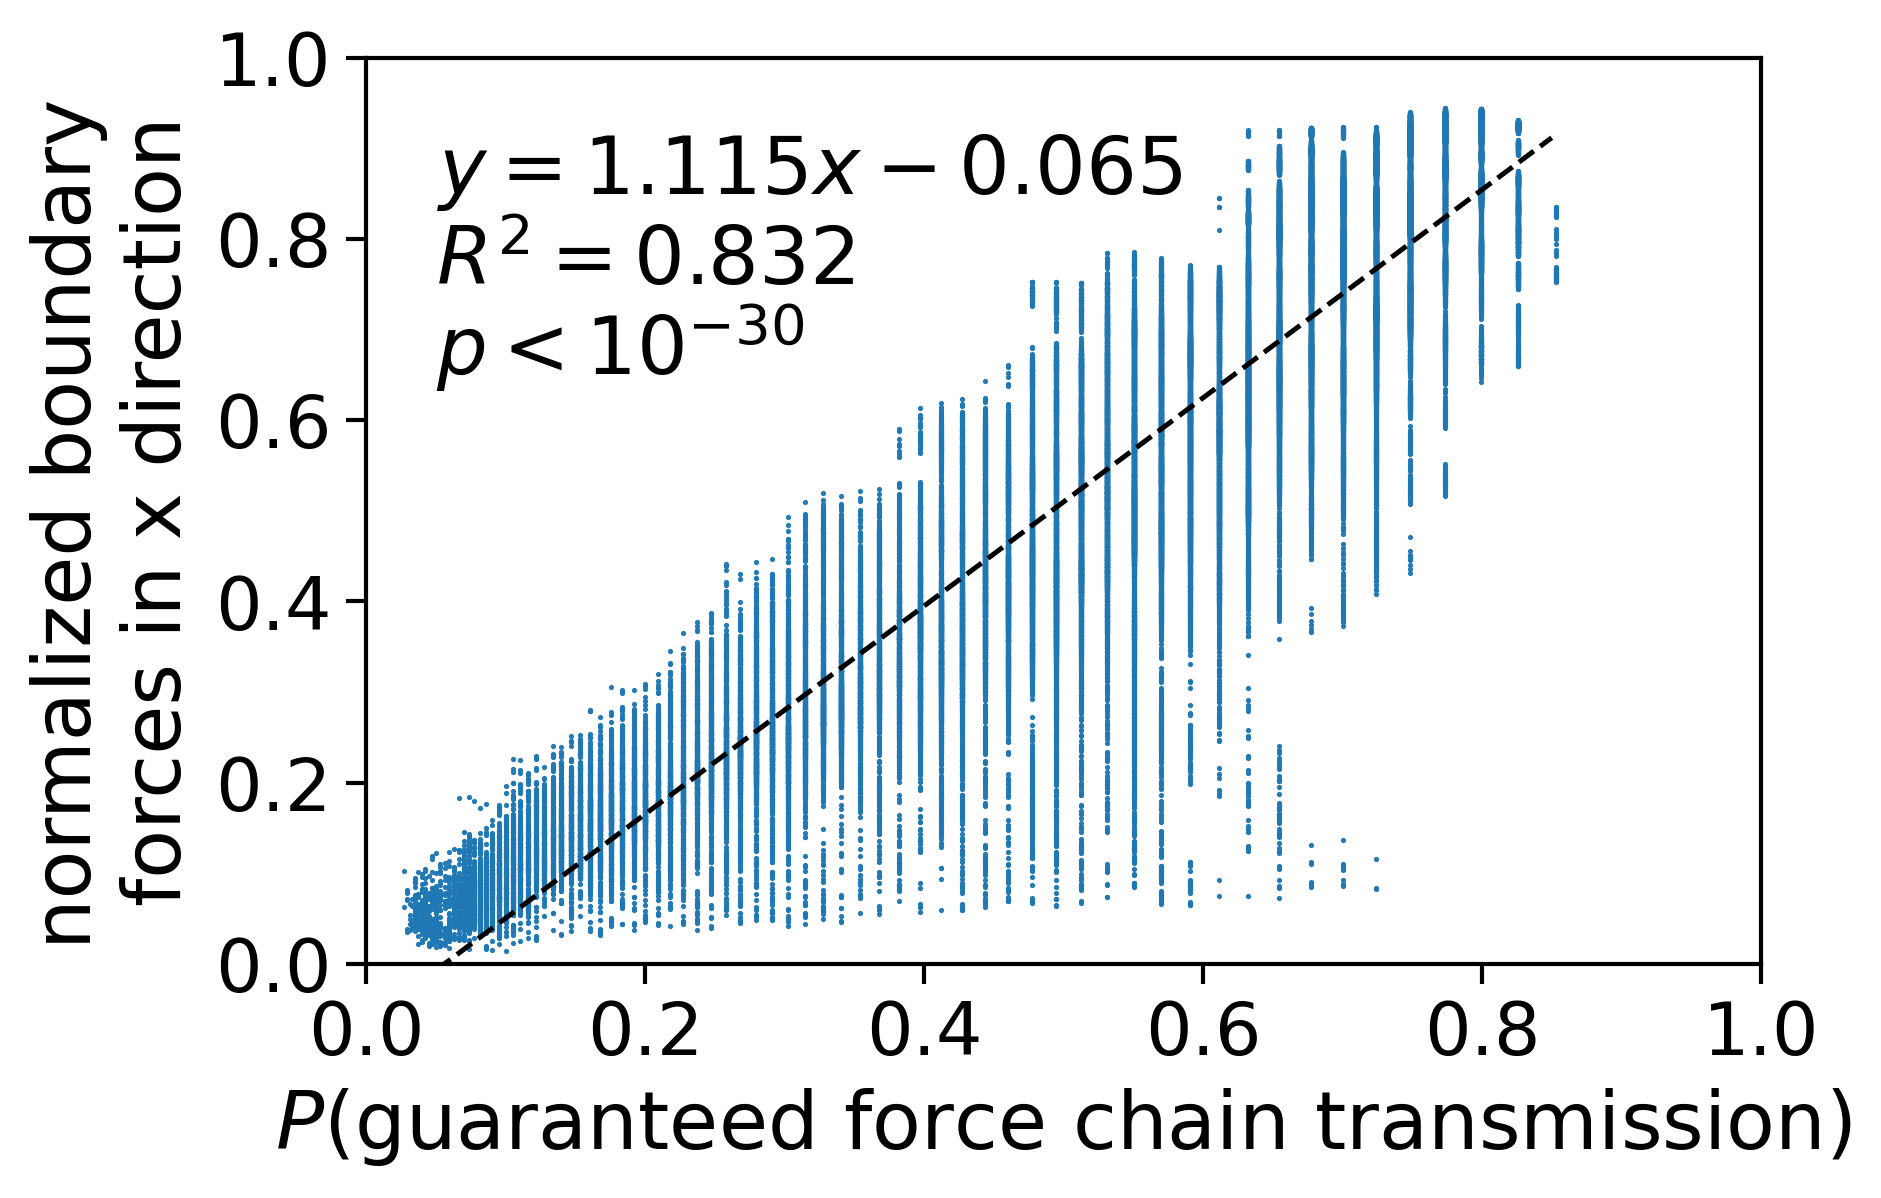

In [22]:
plt.figure(dpi = 300)
sns.set_context('paper', font_scale = 2)
for j in range(len(result_NcRanConstantF15['z_colloid_nowall_below4_all'])):
    plt.scatter(guestimate_all[j], Fx_normalized_all[j], s = .2, color = 'C0')
#plt.gca().set_aspect('equal')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel(r'$P$(guaranteed force chain transmission)')
plt.ylabel('normalized boundary \nforces in x direction')
x_plot = np.linspace(0.05,0.85,100)
plt.plot(x_plot, 1.1488206861479298*x_plot-0.06473892991437447, '--', color = 'black')
ax = plt.gca()
plt.text(0.05, 0.85, r'$y = 1.115x - 0.065$', transform=ax.transAxes)
plt.text(0.05, 0.75, r'$R^2 = 0.832$', transform=ax.transAxes)
plt.text(0.05, 0.65, r'$p<10^{-30}$', transform=ax.transAxes)
plt.savefig('output_figure/Fig5B.png', bbox_inches='tight')

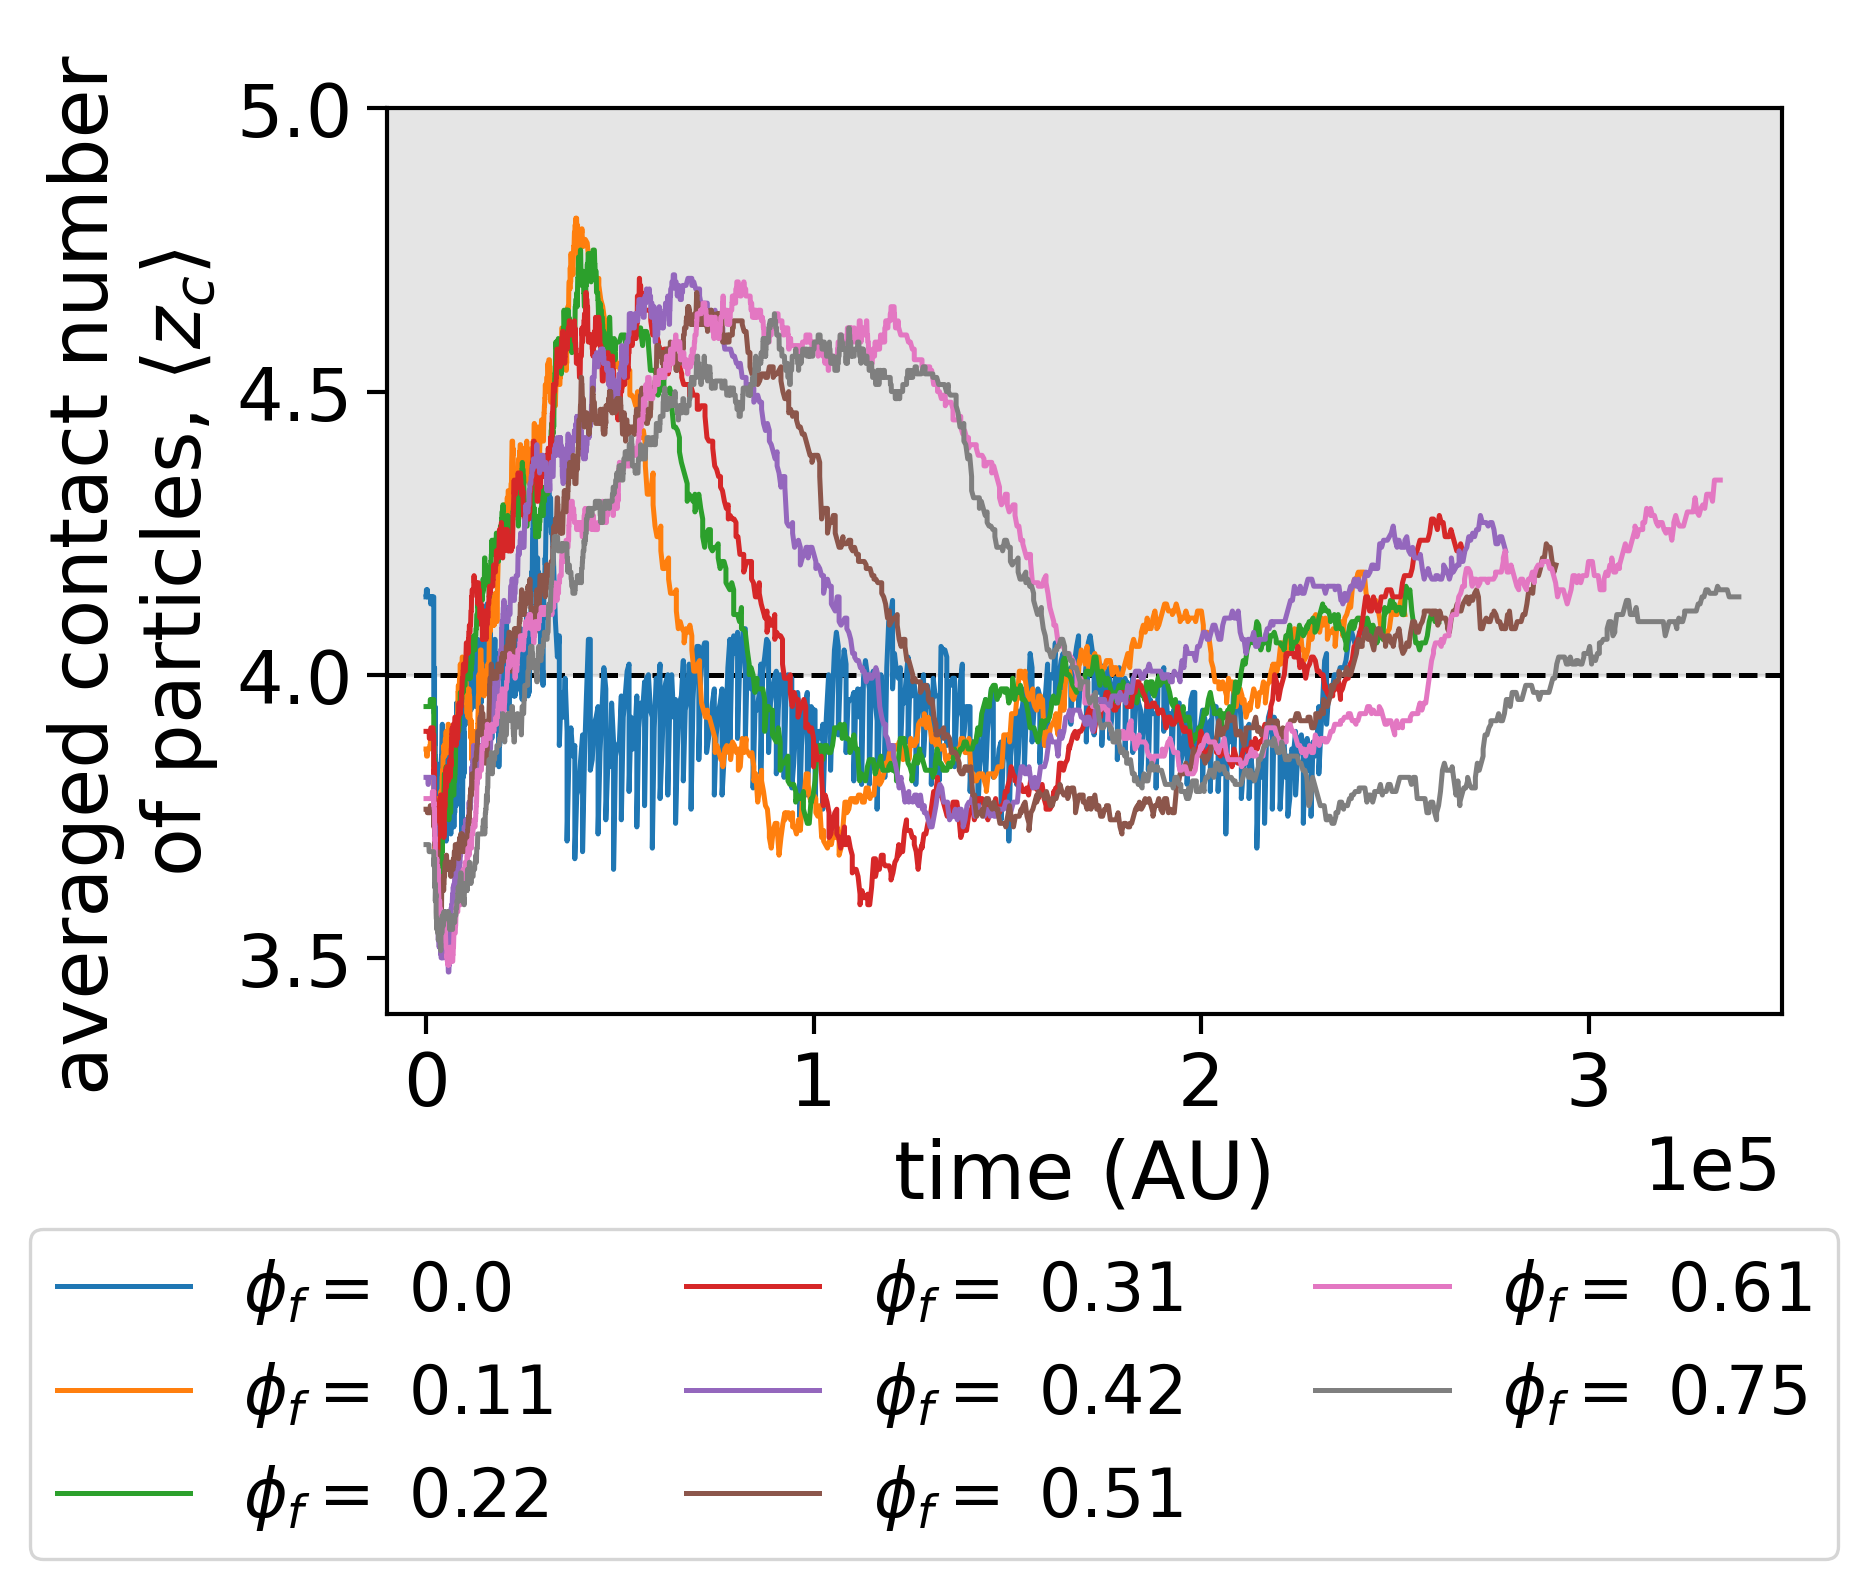

In [23]:
selection_list = [25,46,29,48,44,8,18,35]
plt.figure(dpi = 300)
sns.set_context('paper', font_scale = 2)

for i in selection_list:
    plt.plot(result_NcRanConstantF15['t_correct_all'][i], 
             result_NcRanConstantF15['z_colloid_all'][i], 
             label = r'$\phi_f = $ %s'%round(result_NcRanConstantF15['fil_frac_all'][i],2))
plt.legend(ncol=3, bbox_to_anchor=(-0.28, -0.20), loc='upper left', fontsize = 16)
plt.xlim([-10000,350000])
plt.ylim([3.4,5.0])
plt.hlines(4, -10000, 350000, color = 'black', linestyle = '--')
plt.gca().fill_between([-10000, 350000], 4, 5, alpha = 0.2, color = 'gray')
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.xlabel('time (AU)')
plt.ylabel('averaged contact number \nof particles'+r', $\langle z_{c}\rangle$')
plt.savefig('output_figure/Fig5C.png', bbox_inches='tight')

# Supplementary

Loading Simulation data from disk .......
Loading hdf5 file
464
446


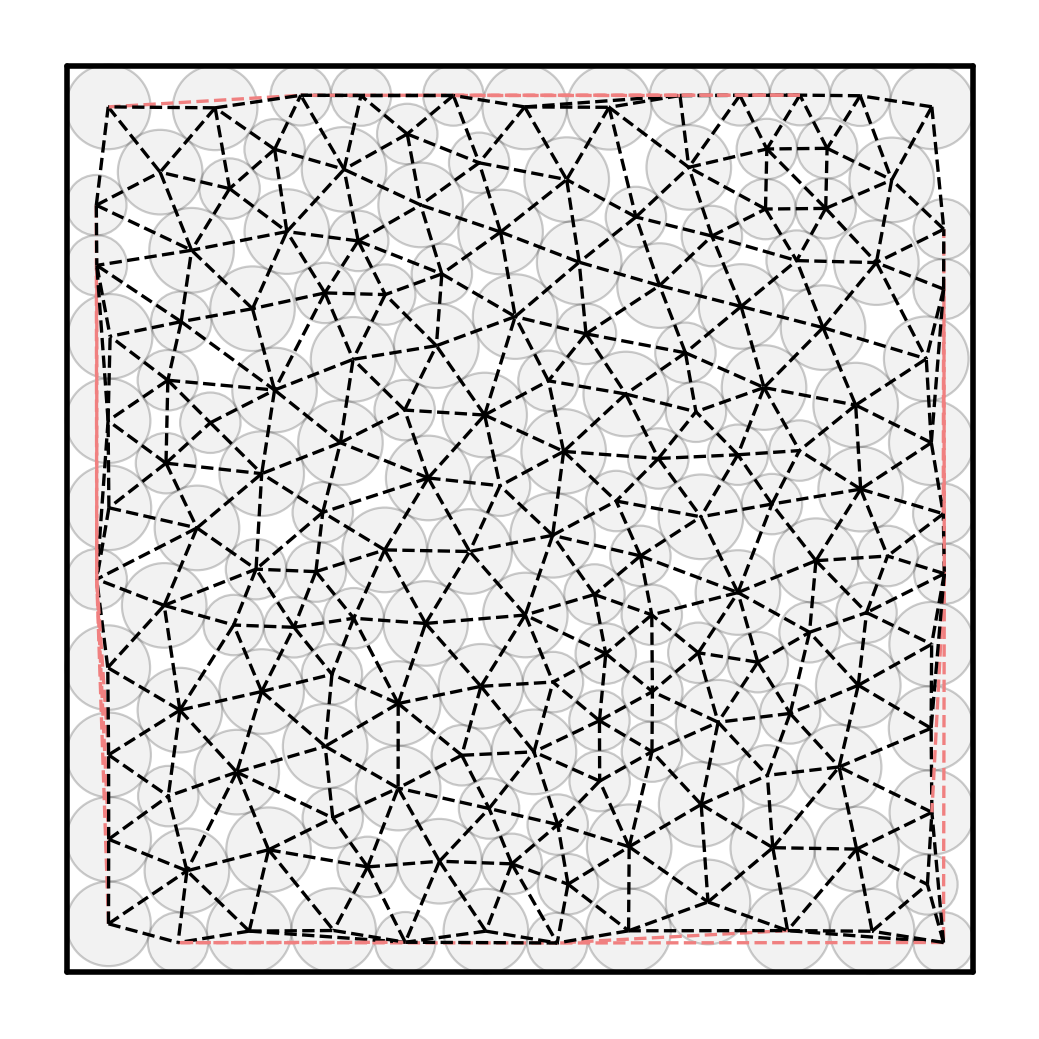

In [26]:
canvas_initial_xy = np.array([[-15, -15], [15, -15], [15, 15], [-15, 15]])
CF_sys2 = rs.Colloid_and_Filament(Nc = 160, Nf = 0, 
                            canvas_initial_xy = canvas_initial_xy, random_init = False, mLf = 6,
                            periodic_bc = False, full_repulsion = True, seed = 0)
CF_sys2.load_data(
    file = 'deform_data/NcRan_constantF/SimResults_Nc_160_Np_10_Nf_0_volfrac_0.83_filfrac_0.0_solver_bdf_mLf6.4_deform_hardBC_constantF_15_seed1/SimResults_{0:03d}.hdf5'.format(69))
CF_sys2.change_r_expanded(CF_sys2.R[:,-1].flatten())
vor1 = Voronoi(CF_sys2.r_matrix)
rp1 = (np.sort(vor1.ridge_points)).tolist()
print(len(rp1))
rp0 = copy.copy(rp1)

dist_rp = np.sqrt(np.sum((vor1.points[vor1.ridge_points[:,0], :] - vor1.points[vor1.ridge_points[:,1], :])**2, axis = 1))
threshold = CF_sys2.Rc*CF_sys2.bidisperse*4
[drop_list] = np.where(dist_rp > threshold)
drop_list = np.flip(drop_list)
for drop in drop_list:
    rp1.pop(drop)
print(len(rp1))

CF_sys2.plot_system(alpha_colloid = 0.2)
preserved = 0
for rp in rp0:
    if rp in rp1:
        plt.plot(CF_sys2.r_matrix[rp,0], CF_sys2.r_matrix[rp,1], color = 'black', linestyle = '--')
    else:
        plt.plot(CF_sys2.r_matrix[rp,0], CF_sys2.r_matrix[rp,1], color = 'lightcoral', linestyle = '--')

plt.axis('off')
plt.savefig('output_figure/FigS1.png')

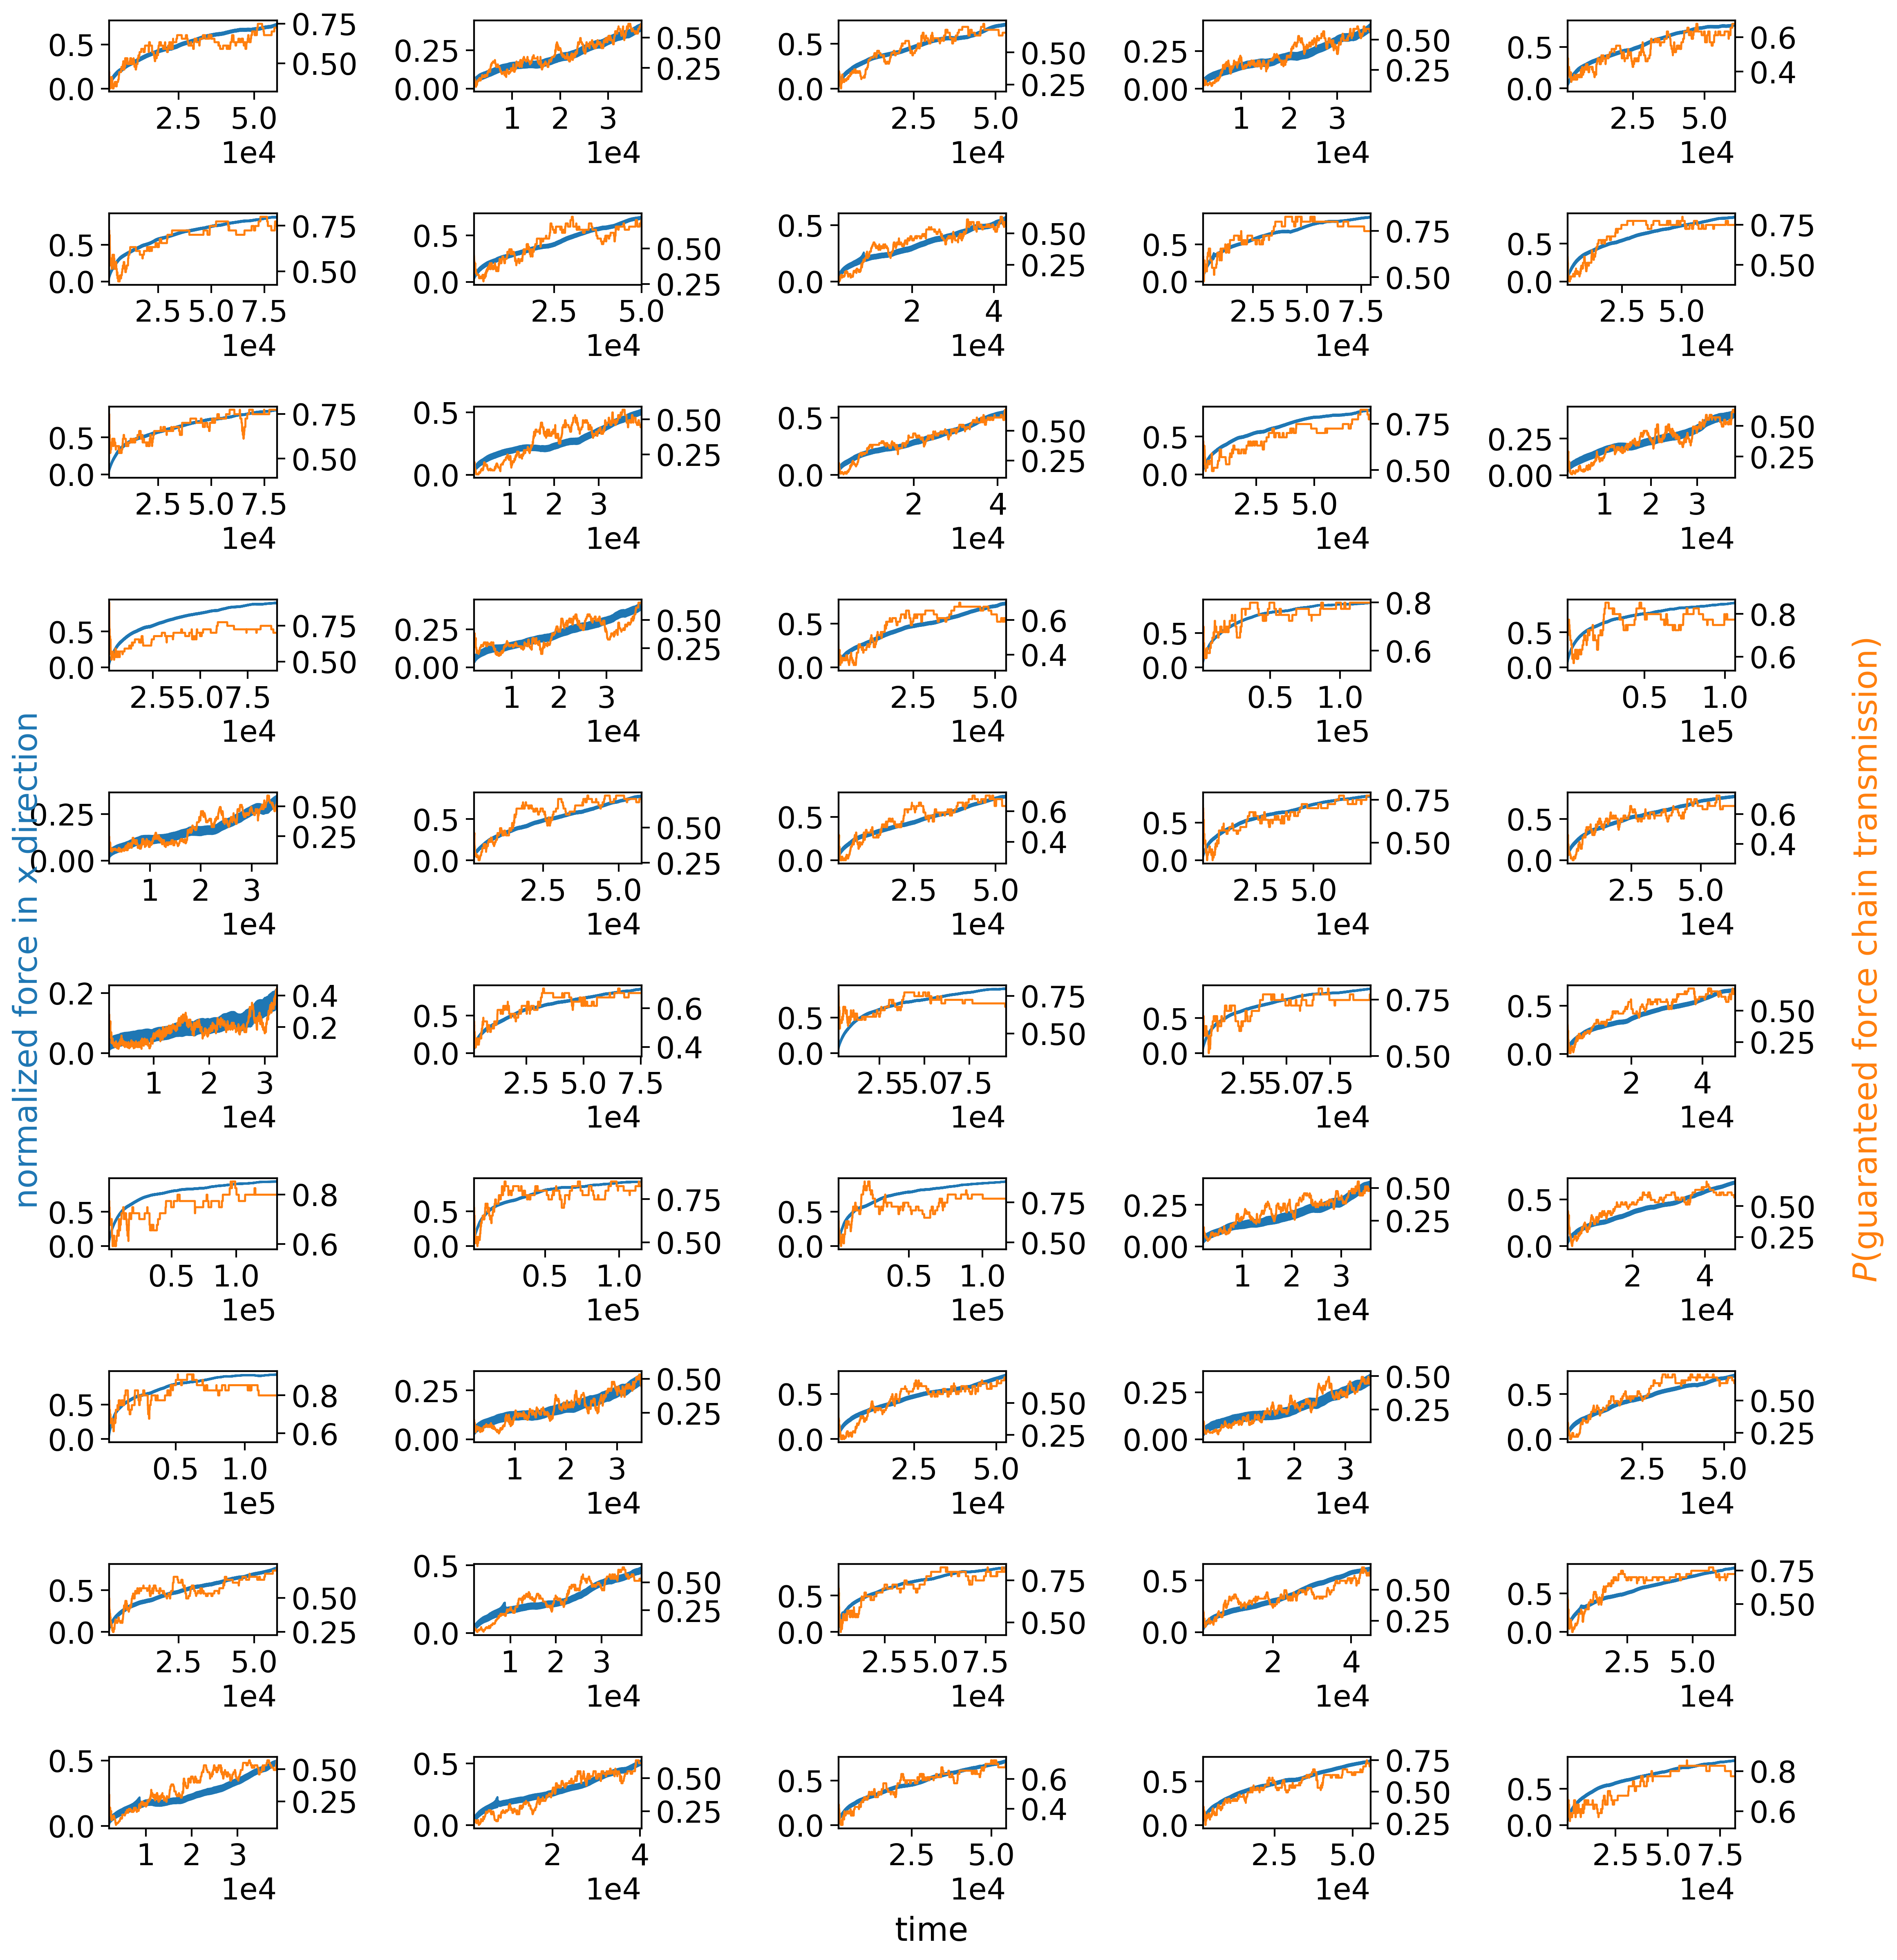

In [27]:
fig = plt.figure(dpi = 300, figsize = (15,16))
for j in range(50):
    plt.subplot(10,5,j+1)
    ax1 = plt.gca()
    ax2 = ax1.twinx()
    ax1.plot(result_NcRanConstantF15['t_correct_all'][j], result_NcRanConstantF15['Fx_all'][j]/30, label = 'normalized Fx', 
             color = 'C0')
    ax2.plot(result_NcRanConstantF15['t_correct_all'][j], 
             (1-result_NcRanConstantF15['z_total_filtered_withwall_below4_all'][j])**5*(1-result_NcRanConstantF15['z_colloid_withwall_below4_all'][j])**0,
            label = 'probability of force chain transmission', color = 'C1')
    t_peak = result_NcRanConstantF15['t_correct_all'][j][np.argmax(result_NcRanConstantF15['Fx_all'][j])]
    plt.xlim([result_NcRanConstantF15['t_correct_all'][j][41], t_peak])
    plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.tight_layout()
#ax1.set_ylabel('Normalized force', color='C0')
#ax2.set_ylabel('P(guaranteed \n force chain transmission)', color='C1')

fig.text(0.5, -0.00, 'time', ha='center')
fig.text(0.00, 0.5, 'normalized force in x direction', va='center', rotation='vertical', color = 'C0')
fig.text(1.00, 0.5, r'$P$(guaranteed force chain transmission)', va='center', rotation='vertical', color = 'C1')
plt.savefig('output_figure/FigS2.png', bbox_inches='tight')

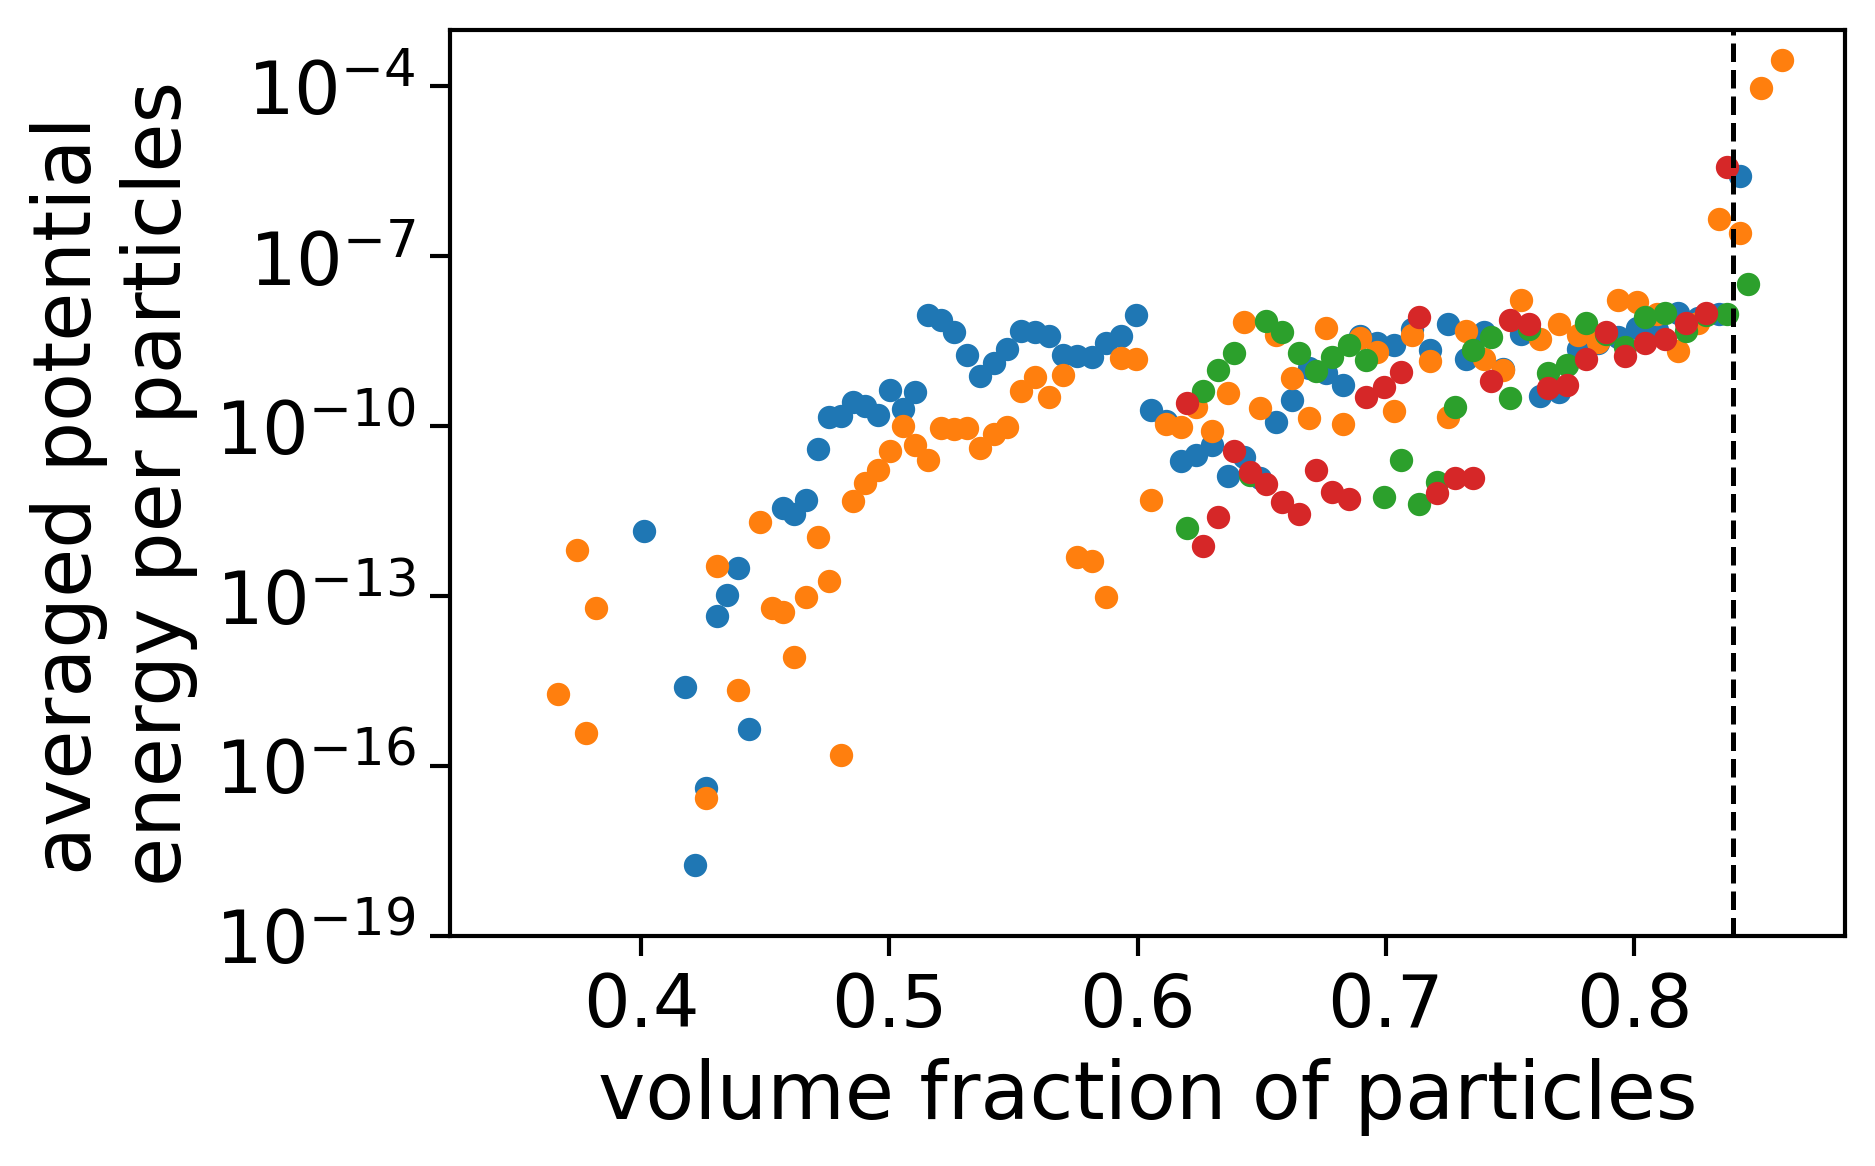

In [2]:
h5_list = ['Nc_120_Nf_0_jamming_periodic_fullRep_odespy_pid00.hdf5', 
           'Nc_120_Nf_0_jamming_periodic_fullRep_to86_seed4.hdf5', 
           'Nc_120_Nf_0_jamming_periodic_odespy.hdf5', 
           'Nc_120_Nf_0_jamming_periodic_odespy_pid01.hdf5']
plt.figure(dpi = 300)
sns.set_context("paper", font_scale = 2)
plt.yscale('log')
for h5 in h5_list:
    result = read_and_plot_folder_hdf5('output_summarized/jamming_validation/'+h5)
    phi = result['vol_frac_arr']
    loc_transition, = np.where(phi[1:] - phi[0:-1] != 0)
    vol_frac = np.hstack([phi[loc_transition], phi[-1]])
    energy = np.hstack([result['U_tot_arr'][loc_transition], result['U_tot_arr'][-1]])
    plt.scatter(vol_frac, energy)
plt.vlines(0.84, 1E-19,1E-3, color = 'black', linestyle = '--')
plt.ylim([1E-19,1E-3])
plt.xlabel('volume fraction of particles')
plt.ylabel('averaged potential \nenergy per particles')
plt.savefig('output_figure/FigS3.png', bbox_inches='tight')
plt.show()